In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold



## **Loan Prediction:**

In [ ]:
import sys
print(sys.version)


3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [2]:
from google.colab  import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [21]:
# read csv file at drive
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,IN,47711
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,IN,47401
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,OK,74012
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801


In [4]:
data_copy = data.copy()
data_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,IN,47711
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,IN,47401
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,OK,74012
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,CA,92106
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,CA,91755
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,CT,6239
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,CA,92627


## using data copy and

## **Understanding Raw Data**
**STEP1: EDA:**

*    Numerical Features

*   categorical features and how many in each
*   Visualise Missing Values

*   Outliers












In [ ]:
data.shape

(614, 15)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  State              614 non-null    object 
 14  Zip                614 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 72.1+ KB


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'State', 'Zip'],
      dtype='object')

####**Categorical and numerical features**

In [22]:
categorical_columns = data_copy.select_dtypes(include=['object']).columns
list(categorical_columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'State']

In [6]:
numerical_columns = data_copy.select_dtypes(include=['float64', 'int64']).columns
list(numerical_columns)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Zip']

**Check discreet and continous numerical data columns**

* Number of discreate numerical data and continous with thresold = 16.**




*  If numerical columns has unique data < 16, then its discrete numerical data








In [7]:
discrete_numerical_data = [i for i in numerical_columns if len(data_copy[i].unique())<16]
discrete_numerical_data

['Loan_Amount_Term', 'Credit_History']

In [8]:
continuous_numerical_data = [i for i in numerical_columns if len(data[i].unique())>=16]
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Zip']

# **outlier check:**


In [9]:
def detect_outliers_iqr(df): # Function to detect outliers based on IQR
    outlier_count = {}
    for column in df.select_dtypes(include='number'):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]
    return outlier_count

# Detect outliers in all numeric columns
outliers_iqr = detect_outliers_iqr(data_copy)
outliers_df = pd.DataFrame(list(outliers_iqr.items()), columns=['Column', 'Number of Outliers'])
outliers_df

,Column,Number of Outliers
0,ApplicantIncome,50
1,CoapplicantIncome,18
2,LoanAmount,39
3,Loan_Amount_Term,88
4,Credit_History,89
5,Zip,0


In [24]:
data2 = data.copy()

#### **Step2: change the type of credit history**

In [25]:
columns_to_drop= ["Loan_ID","State", "LoanAmount", "Zip"]
drop_columns = FunctionTransformer(lambda data2: data2.drop(columns= columns_to_drop, errors = 'ignore'))

In [40]:
data2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'State', 'Zip'],
      dtype='object')

### **train test**

In [41]:
#Split the data in only two parts: train set and test set
train_set, test_set = train_test_split(data2, test_size=0.2, random_state=42)

### **spliting into features and targets**

In [42]:
target_column_name= "Loan_Status"

input_feature_train_df=train_set.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_set[target_column_name]

input_feature_test_df=test_set.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_set[target_column_name]

               # Mapping target
target_feature_train_df =  target_feature_train_df.replace({'Y': 1, 'N': 0})
target_feature_test_df =  target_feature_test_df.replace({'Y': 1, 'N': 0})


<ipython-input-42-003fa4e2e7a3>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_feature_train_df =  target_feature_train_df.replace({'Y': 1, 'N': 0})
<ipython-input-42-003fa4e2e7a3>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_feature_test_df =  target_feature_test_df.replace({'Y': 1, 'N': 0})


####**num and catg col list**

In [33]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
cat_col_list = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


####**pipeline**

In [44]:
def impute_outliers(X, numerical_cols ):
  df = pd.DataFrame(X, columns=numerical_cols)
  for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = df[col].median()

        df[col] = np.where(df[col] < lower_bound, median_value, df[col])
        df[col] = np.where(df[col] > upper_bound, median_value, df[col])

  return df.to_numpy()


         # Create a FunctionTransformer for outlier imputation
outlier_imputer = FunctionTransformer(lambda df: impute_outliers(df, numerical_cols), validate=False)


    # Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[("drop_columns",  drop_columns),('mean_imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
                                                ('outlier_imputer', outlier_imputer) ])
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))])



    # Combine both transformers
preprocessor = ColumnTransformer(
                transformers=[('num', numeric_transformer, numerical_cols),
               ('cat', categorical_transformer, cat_col_list)])


In [45]:
### initiate transformation

input_feature_train_arr = preprocessor.fit_transform(input_feature_train_df)

# Transform the test data using the fitted preprocessor
input_feature_test_arr = preprocessor.transform(input_feature_test_df)
train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]


In [46]:
train_arr

array([[6.0000e+03, 2.2500e+03, 3.6000e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.9580e+03, 2.9000e+03, 3.6000e+02, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.2500e+03, 1.6950e+03, 3.6000e+02, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [3.2370e+03, 0.0000e+00, 3.6000e+02, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0047e+04, 0.0000e+00, 3.6000e+02, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [3.9000e+03, 0.0000e+00, 3.6000e+02, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00]])

## splitting


In [48]:
 X_train,y_train,X_test,y_test=(train_arr[:,:-1],train_arr[:,-1],test_arr[:,:-1],test_arr[:,-1])

#### **model**

In [49]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd


# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}


def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Call the function to evaluate models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print(model_report_df)

# Save the DataFrame to a CSV file with the specified name
model_report_df.to_csv('classification_report_15var.csv', index=False)


                 Model                                    Best Parameters  \
0        Random Forest                              {'n_estimators': 100}   
1        Decision Tree  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
2  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.764228   0.769494  0.764228  0.743310    123.0               24   
1  0.756098   0.802048  0.756098  0.715388    123.0               29   
2  0.788618   0.825253  0.788618  0.761491    123.0               25   

   False Negatives  
0                5  
1                1  
2                1  


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle  # Importing pickle for saving models
import os

                  # Target variable

random_state = 42

# Define your models and parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    "SVM": SVC(class_weight={0: 1, 1: 100}),
    "Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier()
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20],
        'class_weight': [{0: 1, 1: 100}]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': [{0: 1, 1: 100}]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV to find the best parameters
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')  # You can change scoring as needed
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Save the model to disk as a pickle file
        # with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
        #     pickle.dump(model, file)

        save_dir = 'D:\\Git_Hub_Project_Final'
        os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn'
        # Clean the model name for use in the filename
        model_name_cleaned = model_name.replace(" ", "_")
        save_path = os.path.join(save_dir, f'{model_name_cleaned}.pkl')

# Save the model to disk




#

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model, gs.best_params_

# Evaluate the models
model_report_df, best_model, best_params = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

print("\nBest Parameters:")
print(best_params)


Model Report:
                 Model                                    Best Parameters  \
0  Logistic Regression  {'C': 0.1, 'penalty': 'l1', 'solver': 'libline...   
1        Random Forest  {'class_weight': {0: 1, 1: 100}, 'max_depth': ...   
2                  SVM  {'C': 1, 'class_weight': {0: 1, 1: 100}, 'kern...   
3    Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
4                  KNN           {'n_neighbors': 9, 'weights': 'uniform'}   

   Accuracy  Precision    Recall  F1-Score  Support  False Positives  \
0  0.788618   0.825253  0.788618  0.761491    123.0               25   
1  0.788618   0.825253  0.788618  0.761491    123.0               25   
2  0.658537   0.776090  0.658537  0.531064    123.0               42   
3  0.756098   0.802048  0.756098  0.715388    123.0               29   
4  0.585366   0.500741  0.585366  0.520425    123.0               39   

   False Negatives  
0                1  
1                1  
2                0  
3     

In [60]:
import os

# Define the path to save the models
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
models_folder = "MyModels"  # Name of your folder
save_dir = os.path.join(desktop_path, models_folder)

# Create the folder if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    best_model = None
    best_score = 0

    for model_name, model in models.items():
        para = params.get(model_name, {})
        gs = GridSearchCV(model, para, cv=3, n_jobs=-1, scoring='accuracy')
        gs.fit(X_train, y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Save the model to the new folder on Desktop
        save_path = os.path.join(save_dir, f'{model_name.replace(" ", "_")}.pkl')

        with open(save_path, 'wb') as file:
            pickle.dump(model, file)

        # Make predictions and calculate metrics as before...
        # (Keep the rest of your evaluation code here)

    return report_df, best_model, gs.best_params_

# Evaluate the models as before...


In [61]:
save_path = f'D:\\Git_Hub_Project_Final\\{model_name.replace(" ", "_")}.pkl'

# Save the model to disk as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(model, file)

NameError: name 'model_name' is not defined

In [55]:

# Define your models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight={0: 1, 1: 100}),
    #"SVM": SVC(class_weight={0: 1, 1: 100}, random_state=random_state, probability=True),
    #"Gradient Boosting": GradientBoostingClassifier(random_state=random_state),
    #"KNN": KNeighborsClassifier()
}

def evaluate_models(X_train, y_train, X_test, y_test, models):
    report = []
    best_model = None
    best_score = 0  # Initialize to track the best score

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Save the model to disk as a pickle file
        with open(f'{model_name.replace(" ", "_")}.pkl', 'wb') as file:
            pickle.dump(model, file)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store results in the report
        report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1)),
            'False Negatives': sum((y_test == 1) & (y_test_pred == 0))
        })

        # Check if this model is the best
        if acc > best_score:
            best_score = acc
            best_model = model

    # Convert report to DataFrame
    report_df = pd.DataFrame(report)

    return report_df, best_model

# Evaluate the models
model_report_df, best_model = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the results
print("Model Report:")
print(model_report_df)

print("\nBest Model:")
print(best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Report:
                 Model  Accuracy  Precision    Recall  F1-Score  Support  \
0  Logistic Regression  0.788618   0.825253  0.788618  0.761491    123.0   
1        Random Forest  0.747967   0.744953  0.747967  0.729023    123.0   

   False Positives  False Negatives  
0               25                1  
1               24                7  

Best Model:
LogisticRegression()


## step3:


In [34]:
#step 3: # Updated numerical and categorical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
cat_col_list = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

#### **train test split**

In [12]:
# Separate the features
data2 = data.copy()
features = data2.drop(["Loan_ID","State", "LoanAmount", "Zip","Loan_Status"], axis = 1)
features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban


In [13]:
target = data2["Loan_Status"]
target

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7)

**changing /encoding y loan status**

In [15]:
# y_train =  y_train.replace({'Loan_Status': {'Y': 1,
#                                 'N': 0}})


# y_test= y_test.replace({'Loan_Status': {'Y': 1,
#                                 'N': 0}})
# Replace 'Y' with 1 and 'N' with 0 in y_train
y_train = y_train.replace({'Y': 1, 'N': 0})

# Replace 'Y' with 1 and 'N' with 0 in y_test
y_test = y_test.replace({'Y': 1, 'N': 0})

y_train

<ipython-input-15-1941776aabfc>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Y': 1, 'N': 0})
<ipython-input-15-1941776aabfc>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Y': 1, 'N': 0})


,Loan_Status
255,1
388,1
417,0
410,0
69,0
...,...
8,1
228,1
520,1
177,0


#### **final pipeline**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split

# Sample data (replace with your actual data)


# Step 1: Convert Credit_History to Object before splitting
data2['Credit_History'] = data2['Credit_History'].astype('object')

# Step 2: Split the data into features and target
X = data2.drop(["Loan_ID","State", "LoanAmount", "Zip","Loan_Status"], axis = 1)
y = data2['Loan_Status']  # Replace 'Target' with your actual target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Updated numerical and categorical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
cat_col_list = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area']

# Function to impute outliers
def impute_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = df[col].median()

        df[col] = np.where(df[col] < lower_bound, median_value, df[col])
        df[col] = np.where(df[col] > upper_bound, median_value, df[col])

    return df

# Create a FunctionTransformer for outlier imputation
outlier_imputer = FunctionTransformer(lambda df: impute_outliers(df, numerical_cols), validate=False)

# Updated numerical and categorical columns


# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[

    ('outlier_imputer', outlier_imputer),  # Impute outliers
    ('scaler', StandardScaler())            # Scale the data
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])

# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, cat_col_list)
    ]
)

# Fit and transform your training data
X_train_processed = preprocessor.fit_transform(X_train)

# Convert back to DataFrame for easier interpretation
num_feature_names = numerical_cols
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_col_list)

# Create the new DataFrame for training data
X_train_processed_df = pd.DataFrame(X_train_processed, columns=np.concatenate([num_feature_names, cat_feature_names]))

# Check the shape and first few rows
print(X_train_processed_df.shape)
print(X_train_processed_df.head())


(491, 20)
   ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Gender_Female  \
0         0.956269           0.681552               0.0            0.0   
1        -0.642952           1.132995               0.0            0.0   
2         1.087697           0.296088               0.0            0.0   
3        -1.102951           1.306627               0.0            0.0   
4        -0.007890          -0.881137               0.0            0.0   

   Gender_Male  Married_No  Married_Yes  Dependents_0  Dependents_1  \
0          1.0         0.0          1.0           1.0           0.0   
1          1.0         0.0          1.0           1.0           0.0   
2          1.0         0.0          1.0           0.0           0.0   
3          1.0         0.0          1.0           1.0           0.0   
4          1.0         1.0          0.0           1.0           0.0   

   Dependents_2  Dependents_3+  Education_Graduate  Education_Not Graduate  \
0           0.0            0.0          

In [16]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split

# Sample data (replace with your actual data)
data3 = data.copy()
# Step 1: Convert Credit_History to Object before splitting
data3['Credit_History'] = data3['Credit_History'].astype('object')

# Step 2: Split the data into features and target
X = data3.drop(["Loan_ID", "State", "LoanAmount", "Zip", "Loan_Status"], axis=1)
y = data3['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Updated numerical and categorical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
cat_col_list = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Function to impute outliers
def impute_outliers(X):
    df = pd.DataFrame(X, columns=numerical_cols)
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = df[col].median()

        df[col] = np.where(df[col] < lower_bound, median_value, df[col])
        df[col] = np.where(df[col] > upper_bound, median_value, df[col])

    return df.to_numpy()

# Create a FunctionTransformer for outlier imputation
outlier_imputer = FunctionTransformer(impute_outliers, validate=False)

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('mean_imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('outlier_imputer', outlier_imputer)              # Impute outliers
                            # Scale the data
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encode and drop the first category
])

# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, cat_col_list)
    ])

# Fit and transform your training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_processed = preprocessor.transform(X_test)

# Convert back to DataFrame for easier interpretation
num_feature_names = numerical_cols
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_col_list)

# Create the new DataFrame for training data
X_train_processed_df = pd.DataFrame(X_train_processed, columns=np.concatenate([num_feature_names, cat_feature_names]))

# Create the new DataFrame for testing data
X_test_processed_df = pd.DataFrame(X_test_processed, columns=np.concatenate([num_feature_names, cat_feature_names]))

# Check the shape and first few rows
print("Training Data Shape:", X_train_processed_df.shape)
print("Training Data Sample:\n", X_train_processed_df.head())
print("Testing Data Shape:", X_test_processed_df.shape)
print("Testing Data Sample:\n", X_test_processed_df.head())


Training Data Shape: (491, 13)
Training Data Sample:
    ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Gender_Male  \
0           6000.0             2250.0             360.0          1.0   
1           2958.0             2900.0             360.0          1.0   
2           6250.0             1695.0             360.0          1.0   
3           2083.0             3150.0             360.0          1.0   
4           4166.0                0.0             360.0          1.0   

   Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0          1.0           0.0           0.0            0.0   
1          1.0           0.0           0.0            0.0   
2          1.0           0.0           1.0            0.0   
3          1.0           0.0           0.0            0.0   
4          0.0           0.0           0.0            0.0   

   Education_Not Graduate  Self_Employed_Yes  Credit_History_1.0  \
0                     0.0                0.0                 1.0   
1         

# Combining train processed with target

In [ ]:
train_arr = np.c_[X_train_processed, np.array()]
test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

In [17]:
X_train_processed_df

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,6000.0,2250.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2958.0,2900.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,6250.0,1695.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2083.0,3150.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4166.0,0.0,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,1875.0,1875.0,360.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
487,3900.0,1126.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
488,3237.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
489,10047.0,0.0,360.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [18]:
X_train_processed_df.isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0
Gender_Male,0
Married_Yes,0
Dependents_1,0
Dependents_2,0
Dependents_3+,0
Education_Not Graduate,0
Self_Employed_Yes,0


In [ ]:
# Display original statistics for numerical columns in training data
print("Original Training Data Statistics:")
print(X_train[numerical_cols].describe())

# Display statistics for processed training data
print("\nProcessed Training Data Statistics:")
print(X_train_processed_df[num_feature_names].describe())


Original Training Data Statistics:
       ApplicantIncome  CoapplicantIncome  Loan_Amount_Term
count       491.000000         491.000000        479.000000
mean       5502.645621        1676.488635        340.283925
std        5932.951396        3177.641499         67.708849
min         150.000000           0.000000         12.000000
25%        2918.500000           0.000000        360.000000
50%        3900.000000        1126.000000        360.000000
75%        5938.000000        2333.000000        360.000000
max       81000.000000       41667.000000        480.000000

Processed Training Data Statistics:
       ApplicantIncome  CoapplicantIncome  Loan_Amount_Term
count       491.000000         491.000000             491.0
mean       4181.008147        1268.684155             360.0
std        1904.116802        1441.294760               0.0
min         150.000000           0.000000             360.0
25%        2918.500000           0.000000             360.0
50%        3900.000000      

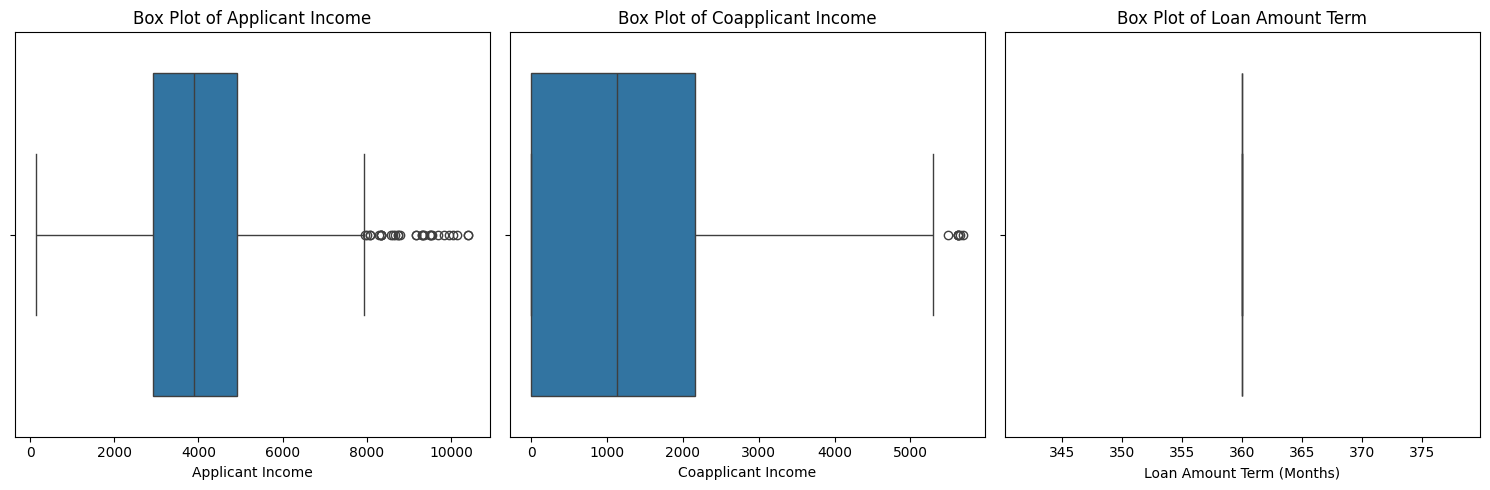

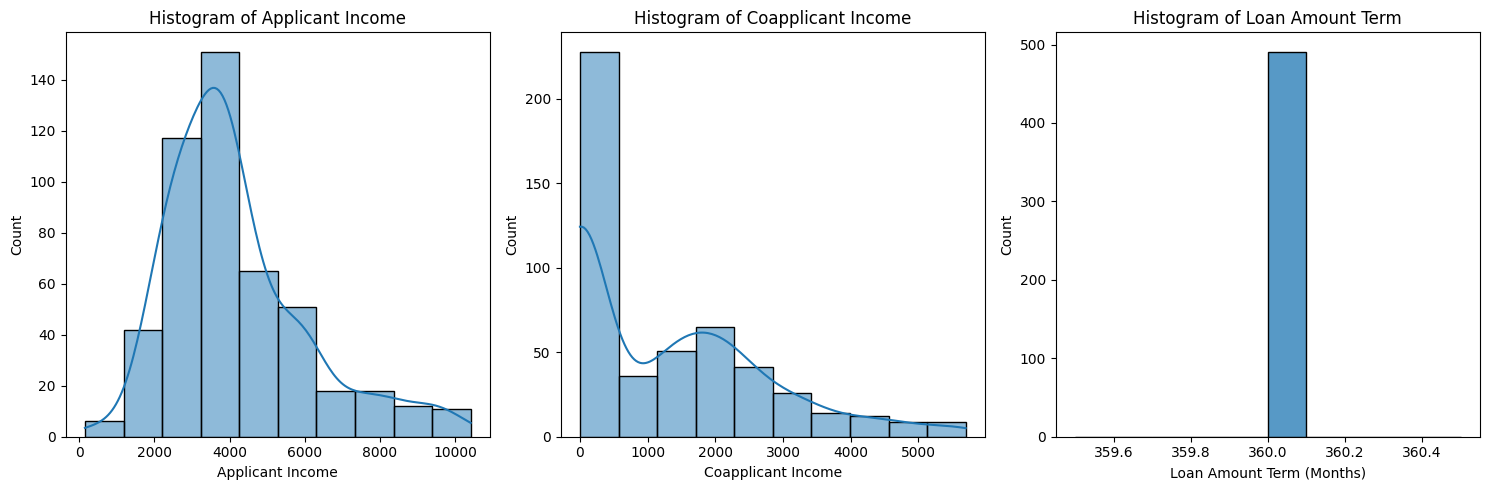

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (replace this with your actual DataFrame)
# data = pd.read_csv('path_to_your_data.csv') # Load your data

# Set the figure size
plt.figure(figsize=(15, 5))

# Box plots
plt.subplot(1, 3, 1)
sns.boxplot(x=X_train_processed_df['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.xlabel('Applicant Income')

plt.subplot(1, 3, 2)
sns.boxplot(x=X_train_processed_df['CoapplicantIncome'])
plt.title('Box Plot of Coapplicant Income')
plt.xlabel('Coapplicant Income')

plt.subplot(1, 3, 3)
sns.boxplot(x=X_train_processed_df['Loan_Amount_Term'])
plt.title('Box Plot of Loan Amount Term')
plt.xlabel('Loan Amount Term (Months)')

plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(X_train_processed_df['ApplicantIncome'], bins=10, kde=True)
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')

plt.subplot(1, 3, 2)
sns.histplot(X_train_processed_df['CoapplicantIncome'], bins=10, kde=True)
plt.title('Histogram of Coapplicant Income')
plt.xlabel('Coapplicant Income')

plt.subplot(1, 3, 3)
sns.histplot(X_train_processed_df['Loan_Amount_Term'], bins=10, kde=False)
plt.title('Histogram of Loan Amount Term')
plt.xlabel('Loan Amount Term (Months)')

plt.tight_layout()
plt.show()


##### IMPROVEMENTS:

**WILL ADD BINING TO IT IE RANGE A LOW HIGH... FOR BETTER RESULT USING FUNCTTION TRANSFORMER OT CUSTOM TRANSFORMER**

##########################################################ENNNNNNNNND###########

In [ ]:
X_train_processed_df["Loan_Amount_Term"]

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0
...,...
486,360.0
487,360.0
488,360.0
489,360.0


##** check imblance**

In [ ]:
data_copy.shape

(614, 15)

####** considering features except "Loan_ID","State", "Income_Category", "LoanAmount", "Zip"**

*italicized text*

In [ ]:

# Separate the features
features = data2.drop(["Loan_ID","State", "LoanAmount", "Zip","Loan_Status"], axis = 1)
features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban


In [ ]:
target = data2["Loan_Status"]
target


,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


#### **train test split**

In [ ]:
data5 = data.copy()
# Separate the features
features = data5.drop(["Loan_ID","State", "LoanAmount", "Zip","Loan_Status"], axis = 1)
features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban


In [ ]:
data6 = data.copy()
# Separate the features
features = data5.drop(["Loan_ID","State", "LoanAmount", "Zip","Loan_Status"], axis = 1)
features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban


In [ ]:

# Separate the features
target = data5["Loan_Status"]
target

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [ ]:
# Separate the features
target = data6["Loan_Status"]
target

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7)


In [ ]:
X_test.head(), X_test.shape

(    Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
 512   Male     Yes          2      Graduate            No             3283   
 172   Male     Yes         3+  Not Graduate            No             3522   
 8     Male     Yes          2      Graduate            No             4006   
 157   Male     Yes          1      Graduate            No             9538   
 163   Male     Yes          2      Graduate            No             4167   
 
      CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  
 512             2035.0             360.0             1.0         Urban  
 172                0.0             180.0             1.0         Rural  
 8               1526.0             360.0             1.0         Urban  
 157                0.0             360.0             1.0         Urban  
 163             1447.0             360.0             1.0         Rural  ,
 (185, 10))

In [ ]:
X_train.head(), X_train.shape

(    Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
 369   Male     Yes          0      Graduate            No            19730   
 282   Male     Yes          2      Graduate            No             2301   
 330   Male      No          1      Graduate            No             4384   
 247   Male     Yes          1  Not Graduate            No             6608   
 605   Male     Yes          0  Not Graduate            No             2400   
 
      CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  
 369        5266.000000             360.0             1.0         Rural  
 282         985.799988             180.0             1.0         Urban  
 330        1793.000000             360.0             1.0         Urban  
 247           0.000000             180.0             1.0         Urban  
 605        3800.000000             180.0             1.0         Urban  ,
 (429, 10))

In [ ]:
y_train.head()

,Loan_Status
369,N
282,Y
330,Y
247,Y
605,N


In [ ]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
576,NaN,Yes,0,Graduate,No,3087,2210.0,360.0,0.0,Semiurban
310,Female,No,0,Graduate,No,2917,0.0,360.0,1.0,Semiurban
388,Male,Yes,0,Graduate,No,2333,2417.0,360.0,1.0,Urban
407,Female,No,0,Not Graduate,No,2213,0.0,360.0,1.0,Rural
104,Male,NaN,NaN,Graduate,No,3816,754.0,360.0,1.0,Urban


In [ ]:
# y_train =  y_train.replace({'Loan_Status': {'Y': 1,
#                                 'N': 0}})


# y_test= y_test.replace({'Loan_Status': {'Y': 1,
#                                 'N': 0}})
# Replace 'Y' with 1 and 'N' with 0 in y_train
y_train = y_train.replace({'Y': 1, 'N': 0})

# Replace 'Y' with 1 and 'N' with 0 in y_test
y_test = y_test.replace({'Y': 1, 'N': 0})

y_train

<ipython-input-16-36d1d48a315b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Y': 1, 'N': 0})
<ipython-input-16-36d1d48a315b>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Y': 1, 'N': 0})


,Loan_Status
369,0
282,1
330,1
247,1
605,0
...,...
352,1
226,0
134,1
442,1


#### **seperating catag and numerical columns in xtrain, xtest as only traing data is used**

In [ ]:
# train x num col
numerical_columns_df = X_train.select_dtypes(include=[float, int])
numerical_columns_df


## getting just numerical columns names as list

#
numerical_colXtrain_list = list(X_train.select_dtypes(include=[float, int]).columns)
numerical_colXtrain_list



catagorical_columnsXtrain_df = X_train.select_dtypes(include=[object])
catagorical_columnsXtrain_df


## getting just numerical columns names as list

# catg list for x train
catagorical_colXtrain_list = list(X_train.select_dtypes(include=[object]).columns)
catagorical_colXtrain_list


####

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

#### for x test data:

In [ ]:

numerical_columns_df = X_test.select_dtypes(include=[float, int])
numerical_columns_df


numerical_colXtest_list = list(X_test.select_dtypes(include=[float, int]).columns)
numerical_colXtest_list


catagorical_columnsXtrain_df = X_test.select_dtypes(include=[object])
catagorical_columnsXtrain_df

catagorical_colXtest_list = list(X_test.select_dtypes(include=[object]).columns)
catagorical_colXtest_list


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
numerical_colXtest_list

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

In [ ]:
### Robust scaler



class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lower_bounds = {}
        self.upper_bounds = {}

    # The fit method in your OutlierRemover class is designed to calculate the lower and upper bounds for detecting outliers based on the Interquartile
    #Range (IQR) for each numeric column.
    #X = faetures col

    def fit(self, X, y=None):
        # Calculate quantiles for each numeric column
        for num_col in X.select_dtypes(include= "Float").columns:
            Q1 = X[num_col].quantile(0.25)
            Q3 = X[num_col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[num_col] = Q1 - 1.5 * IQR
            self.upper_bounds[num_col] = Q3 + 1.5 * IQR
        return self

    def transform(self, X):
        # Remove outliers based on the bounds learned during fitting
        for num_col in self.lower_bounds:
            lower_bound = self.lower_bounds[num_col]
            upper_bound = self.upper_bounds[num_col]
            X = X[(X[num_col] >= lower_bound) & (X[num_col] <= upper_bound)]

        return X.reset_index(drop=True)





### try again:
**col transformer and function transformer in pipeline**

In [ ]:
# y_train =  y_train.replace({'Loan_Status': {'Y': 1,
#                                 'N': 0}})


# y_test= y_test.replace({'Loan_Status': {'Y': 1,
#                                 'N': 0}})
# Replace 'Y' with 1 and 'N' with 0 in y_train
y_train = y_train.replace({'Y': 1, 'N': 0})

# Replace 'Y' with 1 and 'N' with 0 in y_test
y_test = y_test.replace({'Y': 1, 'N': 0})

y_train

<ipython-input-38-36d1d48a315b>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Y': 1, 'N': 0})
<ipython-input-38-36d1d48a315b>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Y': 1, 'N': 0})


,Loan_Status
362,1
92,1
106,1
398,1
559,1
...,...
309,1
404,0
34,0
335,1


###** pipeline update 1**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
data5 = data.copy()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
cat_col_list = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
# Function to impute outliers
def impute_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = df[col].median()

        df[col] = np.where(df[col] < lower_bound, median_value, df[col])
        df[col] = np.where(df[col] > upper_bound, median_value, df[col])

    return df

# Create a FunctionTransformer for outlier imputation
outlier_imputer = FunctionTransformer(lambda data5: impute_outliers(data5, numerical_cols), validate=False)

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('outlier_imputer', outlier_imputer),  # Impute outliers
    ('scaler', StandardScaler())            # Scale the data
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])

# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, cat_col_list)
    ]
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Convert back to DataFrame, handling column names
num_feature_names = numerical_cols
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_col_list)

# Create the new DataFrame
X_train_processed_df = pd.DataFrame(X_train_processed, columns=np.concatenate([num_feature_names, cat_feature_names]))

# Check the shape
print(X_train_processed_df.shape)
print(X_train_processed_df )

(429, 19)
     ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0          -0.171109           2.786647               0.0             0.0   
1          -0.979575          -0.200116               0.0             0.0   
2           0.182630           0.363156               0.0             0.0   
3           1.423505          -0.888016               0.0             0.0   
4          -0.924338           1.763659               0.0             0.0   
..               ...                ...               ...             ...   
424        -0.775924           0.565520               0.0             0.0   
425         0.378469          -0.888016               0.0             0.0   
426         0.467741          -0.888016               0.0             0.0   
427         0.362847           0.502717               0.0             0.0   
428        -1.073868           0.222198               0.0             0.0   

     Gender_Female  Gender_Male  Married_No  Married_Yes  Depende

In [ ]:
def convert_credit_history(df):
    print("Before conversion:", df['Credit_History'].head())  # Print first few values
    df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')
    print("After conversion:", df['Credit_History'].head())   # Print first few values
    return df


**#### Final pipeline with int to obj convert of credit**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7)

In [ ]:
# Step 1: Convert Credit_History to Numeric
data6 = data.copy()
def convert_credit_history(df):

    print("Before conversion:", df['Credit_History'].head())  # Print first few values
    df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')
    print("After conversion:", df['Credit_History'].head())   # Print first few values
    return df

# Step 2: Create the FunctionTransformer
# Create the FunctionTransformer for credit history conversion
credit_history_converter = FunctionTransformer(lambda df: convert_credit_history(df), validate=False)


numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
cat_col_list = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

# Step 3: Create the main pipeline
numeric_transformer = Pipeline(steps=[
    ('credit_converter', credit_history_converter),  # Convert to numeric
    ('outlier_imputer', outlier_imputer),            # Impute outliers
    ('scaler', StandardScaler())                      # Scale the data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),  # Include updated numerical columns
        ('cat', categorical_transformer, cat_col_list)
    ]
)

# Fit and transform your training data
X_train_processed = preprocessor.fit_transform(X_train)
# Transform the test data using the fitted preprocessor
X_test_processed = preprocessor.transform(X_test)

# Convert back to DataFrame for easier interpretation
X_test_processed_df = pd.DataFrame(X_test_processed, columns=np.concatenate([num_feature_names, cat_feature_names]))

# Check the shape and first few rows
print(X_test_processed_df.shape)
print(X_test_processed_df.head())


Before conversion: 362    1.0
92     1.0
106    1.0
398    1.0
559    1.0
Name: Credit_History, dtype: float64
After conversion: 362    1.0
92     1.0
106    1.0
398    1.0
559    1.0
Name: Credit_History, dtype: float64
Before conversion: 512    1.0
172    1.0
8      1.0
157    1.0
163    1.0
Name: Credit_History, dtype: float64
After conversion: 512    1.0
172    1.0
8      1.0
157    1.0
163    1.0
Name: Credit_History, dtype: float64
(185, 19)
   ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0        -0.458762           0.489712               0.0             0.0   
1        -0.330501          -0.906537               0.0             0.0   
2        -0.070760           0.140478               0.0             0.0   
3         2.898020          -0.906537               0.0             0.0   
4         0.015642           0.086275               0.0             0.0   

   Gender_Female  Gender_Male  Married_No  Married_Yes  Dependents_0  \
0            0.0         

In [ ]:
distinct_loan_amount_terms = data2['Loan_Amount_Term'].unique()
print(distinct_loan_amount_terms)


[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
import os

def impute_outliers(df, columns):
    """Impute outliers in specified columns using the median."""
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = df[col].median()

        df[col] = np.where(df[col] < lower_bound, median_value, df[col])
        df[col] = np.where(df[col] > upper_bound, median_value, df[col])

    return df

def create_pipeline(numerical_cols, categorical_cols):
    """Create and return the preprocessing pipeline."""
    # Create a FunctionTransformer for outlier imputation
    outlier_imputer = FunctionTransformer(lambda df: impute_outliers(df, numerical_cols), validate=False)

    # Preprocessing for numerical data
    numeric_transformer = Pipeline(steps=[
        ('outlier_imputer', outlier_imputer),
        ('scaler', StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine both transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    return preprocessor

def transform_data(preprocessor, X_train, X_test):
    """Fit the preprocessor on training data and transform both training and test data."""
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed

def save_transformed_data(X_train, X_test, output_dir):
    """Save transformed training and test data to specified directory."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Create feature names for the processed data
    num_feature_names = numerical_cols
    cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)

    # Combine feature names
    all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

    # Convert to DataFrame
    X_train_df = pd.DataFrame(X_train, columns=all_feature_names)
    X_test_df = pd.DataFrame(X_test, columns=all_feature_names)

    # Save DataFrames to CSV files
    X_train_df.to_csv(os.path.join(output_dir, 'X_train_processed.csv'), index=False)
    X_test_df.to_csv(os.path.join(output_dir, 'X_test_processed.csv'), index=False)

if __name__ == "__main__":
    # Example usage
    from data_preparation import load_data, preprocess_data, split_data

    # Load and preprocess the data
    data = load_data('path_to_your_data.csv')
    data = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(data, target_column='Target')

    # Define numerical and categorical columns
    numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
    categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

    # Create the preprocessing pipeline
    preprocessor = create_pipeline(numerical_cols, categorical_cols)

    # Transform the data
    X_train_processed, X_test_processed = transform_data(preprocessor, X_train, X_test)

    # Specify output directory for saving processed data
    output_dir = 'artifacts/processed_data'
    save_transformed_data(X_train_processed, X_test_processed, output_dir)

    print("Transformed data saved successfully.")


In [ ]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
X_train_processed_df.isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,8
Credit_History,41
Gender_Female,0
Gender_Male,0
Married_No,0
Married_Yes,0
Dependents_0,0
Dependents_1,0


In [ ]:
# Transform the test data using the fitted preprocessor
X_test_processed = preprocessor.transform(X_test)

# Convert back to DataFrame for easier interpretation
X_test_processed_df = pd.DataFrame(X_test_processed, columns=np.concatenate([num_feature_names, cat_feature_names]))

# Check the shape and first few rows
print(X_test_processed_df.shape)
print(X_test_processed_df.head())


(185, 19)
   ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0         1.270070           2.310043               0.0             NaN   
1        -0.822234           0.757418               0.0             0.0   
2         1.204790          -0.888016               0.0             0.0   
3        -0.825582           1.728768               0.0             0.0   
4         0.317095           1.105625               0.0             NaN   

   Gender_Female  Gender_Male  Married_No  Married_Yes  Dependents_0  \
0            0.0          1.0         0.0          1.0           1.0   
1            0.0          1.0         0.0          1.0           1.0   
2            0.0          1.0         1.0          0.0           1.0   
3            0.0          1.0         0.0          1.0           1.0   
4            0.0          1.0         0.0          1.0           1.0   

   Dependents_1  Dependents_2  Dependents_3+  Education_Graduate  \
0           0.0           0.0         

In [ ]:
X_test.shape

(185, 10)

In [ ]:
X_train.shape

(429, 10)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierImputer(BaseEstimator, TransformerMixin):
    def __init__(self:
        self.lower_bounds = {}
        self.upper_bounds = {}

    def fit(self, X, y=None):
        # Calculate quantiles for each numeric column
        for num_col in num_col_list:  # Assume num_col_list is defined
            Q1 = X[num_col].quantile(0.25)
            Q3 = X[num_col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[num_col] = Q1 - 1.5 * IQR
            self.upper_bounds[num_col] = Q3 + 1.5 * IQR
        return self

    def transform(self, X):
        # Impute outliers based on the bounds learned during fitting
        for num_col in self.lower_bounds:
            lower_bound = self.lower_bounds[num_col]
            upper_bound = self.upper_bounds[num_col]

            # Replace outliers with the respective bounds
            X[num_col] = np.where(X[num_col] < lower_bound, lower_bound, X[num_col])
            X[num_col] = np.where(X[num_col] > upper_bound, upper_bound, X[num_col])

        return X

# Example usage in a pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('outlier_imputer', OutlierImputer()),        # Impute outliers
    ('scaler', StandardScaler())                   # Scale the data
])

# You can then combine this with categorical transformations as needed


In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

# Define the outlier removal function
def remove_outliers(X):
    for num_col in num_col_list:
        Q1 = X[num_col].quantile(0.25)
        Q3 = X[num_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X = X[(X[num_col] >= lower_bound) & (X[num_col] <= upper_bound)]
    return X.reset_index(drop=True)

# Define your numeric and categorical columns
# Define numerical and categorical columns
num_col_list =  ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
cat_col_list =  ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']  # Replace with actual categorical columns

# Create a pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('outlier_remover', FunctionTransformer(remove_outliers, validate=False)),  # Remove outliers
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale the data
])

# Create a pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode
])

# Combine numeric and categorical transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col_list),  # For numeric features
        ('cat', categorical_transformer, cat_col_list)  # For categorical features
    ]
)

# Ensure that you're only transforming features and not the target variable
input_Xtrain_arr = preprocessor.fit_transform(X_train)
# Note: Ensure X_train has not been filtered or altered after outlier removal
input_Xtest_arr = preprocessor.transform(X_test)

# Concatenate the target variable if needed
# Ensure you are concatenating after confirming both arrays have the same number of rows
train_arr = np.c_[input_Xtrain_arr, y_train.to_numpy()]
test_arr = np.c_[input_Xtest_arr, y_test.to_numpy()]


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 259 and the array at index 1 has size 429

In [ ]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lower_bounds = {}
        self.upper_bounds = {}

    # The fit method in your OutlierRemover class is designed to calculate the lower and upper bounds for detecting outliers based on the Interquartile
    #Range (IQR) for each numeric column.
    #X = faetures col

    def fit(self, X, y=None):
        # Calculate quantiles for each numeric column
        for num_col in X.select_dtypes(include= [int, float]).columns:
            Q1 = X[num_col].quantile(0.25)
            Q3 = X[num_col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[num_col] = Q1 - 1.5 * IQR
            self.upper_bounds[num_col] = Q3 + 1.5 * IQR
        return self

    def transform(self, X):
        # Remove outliers based on the bounds learned during fitting
        for num_col in self.lower_bounds:
            lower_bound = self.lower_bounds[num_col]
            upper_bound = self.upper_bounds[num_col]
            X = X[(X[num_col] >= lower_bound) & (X[num_col] <= upper_bound)]

        return X.reset_index(drop=True)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outlier_remover', OutlierRemover()),
    ('scaler', StandardScaler())
])

# Create a preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])


## combining
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_colXtest_list),      # For numeric features
        ('cat', categorical_transformer, catagorical_colXtest_list) # For categorical features
    ]
)



input_Xtrain_arr = preprocessor.fit_transform(X_train)
input_Xtestrr =  preprocessor.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [ ]:
num_col =  X_test.select_dtypes(include=[float, int]).columns
num_col_list = list(num_col)
num_col_list

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lower_bounds = {}
        self.upper_bounds = {}

    def fit(self, X, y=None):
      if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
        # Calculate quantiles for each numeric column
        for num_col in num_col_list:
            Q1 = X[num_col].quantile(0.25)
            Q3 = X[num_col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds[num_col] = Q1 - 1.5 * IQR
            self.upper_bounds[num_col] = Q3 + 1.5 * IQR
        return self

    def transform(self, X):
        # Remove outliers based on the bounds learned during fitting
        for num_col in self.lower_bounds:
            lower_bound = self.lower_bounds[num_col]
            upper_bound = self.upper_bounds[num_col]
            X = X[(X[num_col] >= lower_bound) & (X[num_col] <= upper_bound)]

        return X.reset_index(drop=True)

# Create a preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('outlier_remover', OutlierRemover()),        # Remove outliers
    ('scaler', StandardScaler())                   # Scale the data
])

# Create a preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode
])
  # Replace with your list of categorical columns

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_colXtest_list),      # For numeric features
        ('cat', categorical_transformer, catagorical_colXtest_list) # For categorical features
    ]
)

# Fit and transform the training data, and transform the test data
input_Xtrain_arr = preprocessor.fit_transform(X_train)
input_Xtest_arr = preprocessor.transform(X_test)  # Corrected variable name


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
numerical_colXtest_list

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

####**converting values of cayag test values loan status in both traon test as numerical:**

#### fiting them

In [ ]:
## fitiiing preprocessor

input_Xtrain_arr = preprocessor.fit_transform(X_train)
input_Xtestrr =  preprocessor.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

#### **Numerical column(Independent Variable correaltion)**

In [ ]:
## condition
# Calculate quartiles
Q1 = data2['ApplicantIncome'].quantile(0.25)
Q2 = data2['ApplicantIncome'].quantile(0.50)  # Median
Q3 = data2['ApplicantIncome'].quantile(0.75)

print("Q1 (25th percentile):", Q1)
print("Q2 (50th percentile, Median):", Q2)
print("Q3 (75th percentile):", Q3)

Q1 (25th percentile): 2898.75
Q2 (50th percentile, Median): 3859.0
Q3 (75th percentile): 5852.5


####**creating column"income category" from applicantincome bins**

In [ ]:
data2 = data_copy.copy()

### seperating groups with quartiles condition

# Calculate quartiles
Q1 = data2['ApplicantIncome'].quantile(0.25)
Q2 = data2['ApplicantIncome'].quantile(0.50)  # Median
Q3 = data2['ApplicantIncome'].quantile(0.75)

print("Q1 (25th percentile):", Q1)
print("Q2 (50th percentile, Median):", Q2)
print("Q3 (75th percentile):", Q3)

# Define income categories based on quartiles
data2['Income_Category'] = pd.cut(data2['ApplicantIncome'],
                               bins=[-float('inf'), Q1, Q2, Q3, float('inf')],
                               labels=['Low', 'Medium', 'High', "Extreme"], right=False)

# Display the DataFrame with new category

data2


Q1 (25th percentile): 2898.75
Q2 (50th percentile, Median): 3859.0
Q3 (75th percentile): 5852.5


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip,Income_Category
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,IN,47401,Medium
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,OK,74012,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801,Extreme
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,CT,6062,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,CA,92106,Medium
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,CA,91755,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,CT,6239,Extreme
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,CA,92627,Extreme


## l**ets do analysis using these categories**

####**Extreme df**

In [ ]:
# for above q3 >5852.5 is extreme
Extreme_df = data2[data2["Income_Category"] == "Extreme"]
Extreme_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip,Income_Category
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,FL,32801,Extreme
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,CT,6073,Extreme
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,TX,79029,Extreme
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,FL,33065,Extreme
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y,MN,56082,Extreme


In [ ]:
Extreme_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000
mean,5800.841667,1027.158333,215.35000,338.000000,0.858333,31201.333333
std,1280.277340,2054.973847,109.62117,62.195139,0.350170,33116.536305
min,4682.000000,0.000000,40.00000,60.000000,0.000000,0.000000
25%,4682.000000,0.000000,140.75000,360.000000,1.000000,5294.750000
50%,5302.500000,0.000000,187.00000,360.000000,1.000000,14206.000000
75%,6557.000000,1169.500000,258.25000,360.000000,1.000000,51379.750000
max,8624.000000,10968.000000,600.00000,480.000000,1.000000,98520.000000


### **High_df:**

In [ ]:
high_df = data2[data2["Income_Category"] == "High"]
high_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,State,Zip,Income_Category
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,IN,46526,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,CT,6062,High
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,FL,32456,High
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y,OK,73112,High
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N,TX,75093,High


### **scatter plot with applicant income  wrt to credit histiry in  extreme df**

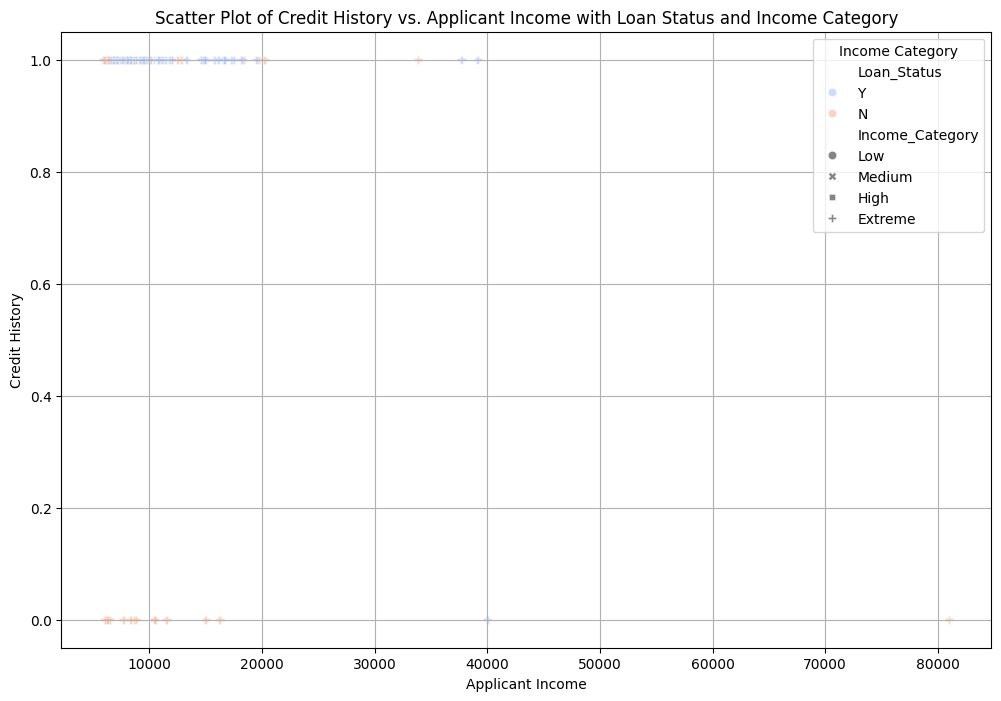

In [ ]:
### scatter plot with income category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ApplicantIncome', y='Credit_History', hue='Loan_Status', palette='coolwarm', alpha=0.6, style='Income_Category', data=Extreme_df)
plt.title('Scatter Plot of Credit History vs. Applicant Income with Loan Status and Income Category')
plt.xlabel('Applicant Income')
plt.ylabel('Credit History')
plt.legend(title='Income Category')
plt.grid(True)
plt.show()


### # **Summary statistics for ApplicantIncome by Income_Category**

In [ ]:
# Summary statistics for ApplicantIncome by Income_Category
income_summary = data2.groupby('Income_Category')['ApplicantIncome'].describe()
income_summary

# this division is made by my condition applied on income


<ipython-input-30-b61f3bd5f4f1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_summary = data2.groupby('Income_Category')['ApplicantIncome'].describe()


,count,mean,std,min,25%,50%,75%,max
Income_Category,,,,,,,,
Low,120.0,2254.950000,467.917878,150.0,2014.0,2372.0,2600.00,2895.0
Medium,119.0,3343.075630,275.579487,2900.0,3101.5,3326.0,3590.50,3858.0
High,121.0,4682.785124,601.391154,3859.0,4167.0,4583.0,5166.00,5829.0
Extreme,120.0,11164.950000,8968.282498,5923.0,6591.0,8645.0,11817.75,81000.0


#### **extreme df stattistics**

In [ ]:
# for above q3 >5852.5 is extreme
Extreme_df = data2[data2["Income_Category"] == "Extreme"]
Extreme_df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000
mean,11164.950000,1027.158333,215.35000,338.000000,0.858333,31201.333333
std,8968.282498,2054.973847,109.62117,62.195139,0.350170,33116.536305
min,5923.000000,0.000000,40.00000,60.000000,0.000000,0.000000
25%,6591.000000,0.000000,140.75000,360.000000,1.000000,5294.750000
50%,8645.000000,0.000000,187.00000,360.000000,1.000000,14206.000000
75%,11817.750000,1169.500000,258.25000,360.000000,1.000000,51379.750000
max,81000.000000,10968.000000,600.00000,480.000000,1.000000,98520.000000


### Statistics of high df

In [ ]:
high_df = data2[data2["Income_Category"] == "High"]
high_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Zip
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,4682.785124,1408.925620,138.487603,347.305785,0.884298,34864.471074
std,601.391154,1932.254112,58.300960,51.012881,0.321198,33657.395982
min,3859.000000,0.000000,26.000000,84.000000,0.000000,0.000000
25%,4167.000000,0.000000,110.000000,360.000000,1.000000,4106.000000
50%,4583.000000,736.000000,130.000000,360.000000,1.000000,19611.000000
75%,5166.000000,2306.000000,160.000000,360.000000,1.000000,70130.000000
max,5829.000000,11300.000000,495.000000,480.000000,1.000000,99654.000000


#### **Box Plot of Applicant Income by Income Category**

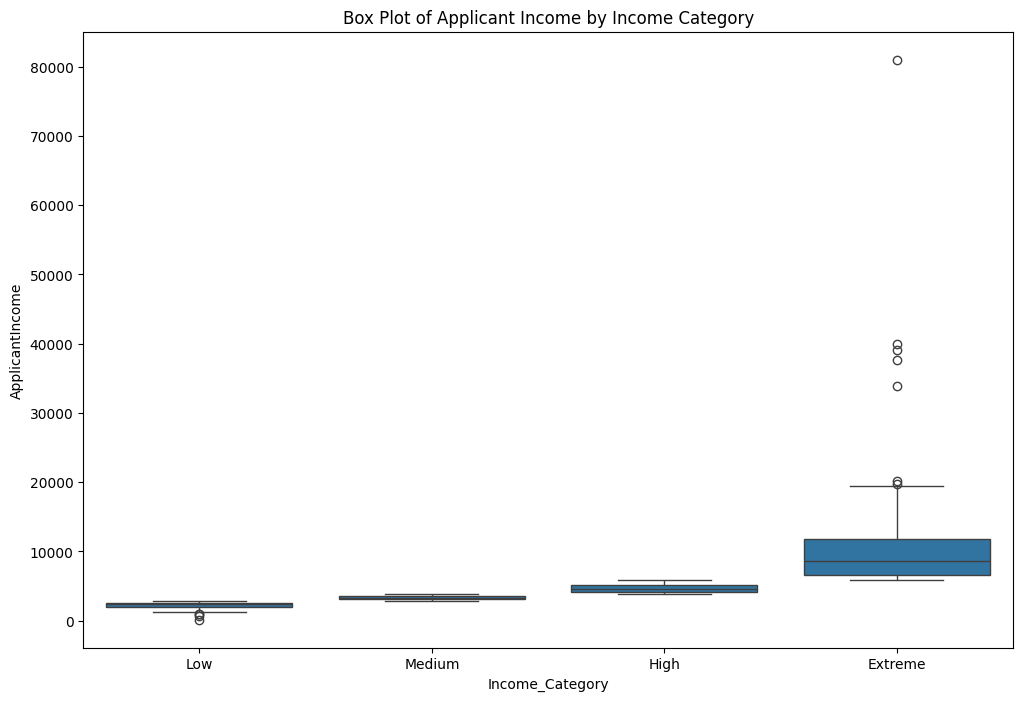

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot of Applicant Income by Income Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Category', y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income by Income Category')
plt.show()


### **we see some ouliers in low category income but extreme applicant income category has max outliers**

In [ ]:
#reate crosstab
crosstab_result = pd.crosstab(data2['Income_Category'], data2['Loan_Status'])
crosstab_result

Loan_Status,N,Y
Income_Category,,
Low,38,82
Medium,35,84
High,35,86
Extreme,40,80


In [ ]:
crosstab_result = pd.crosstab(data2['Income_Category'], data2['Credit_History'])
crosstab_result

Credit_History,0.0,1.0
Income_Category,,
Low,21,99
Medium,18,101
High,14,107
Extreme,17,103


In [ ]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

,ApplicantIncome
Loan_Status,
N,5730.189189
Y,5201.093373


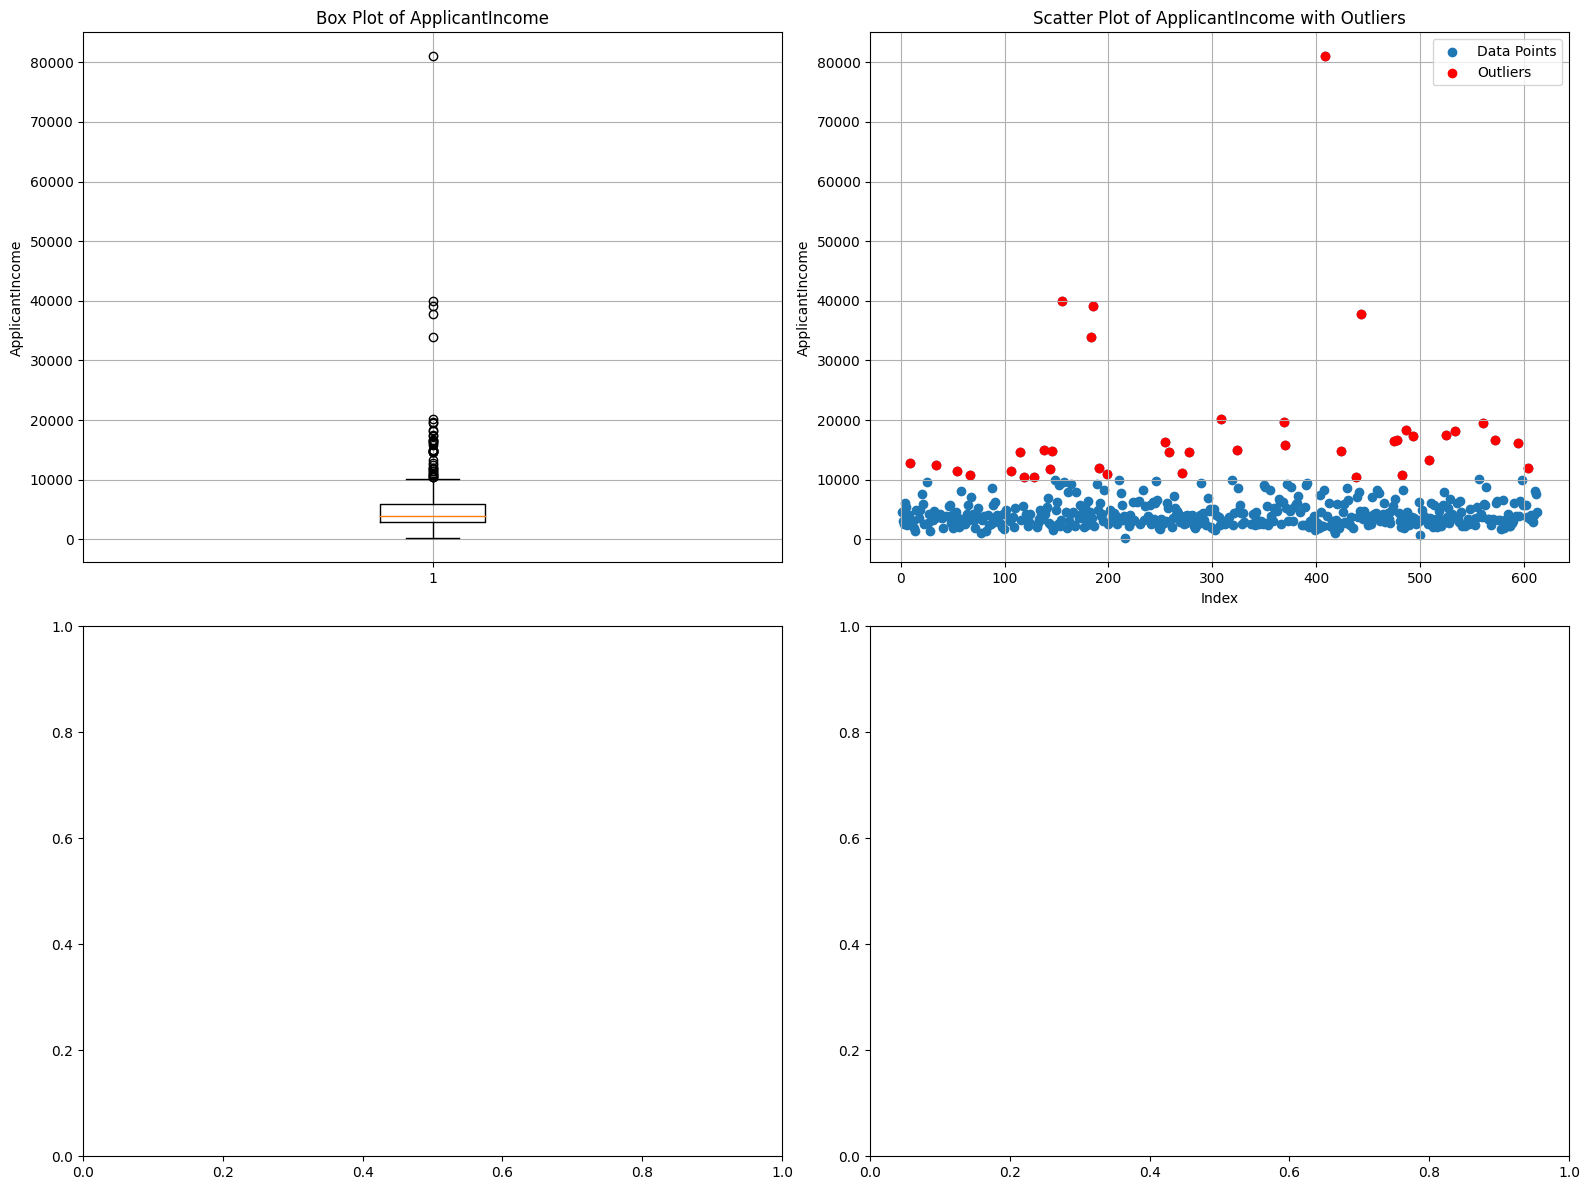

In [ ]:
def outliers(numerical_data, features):
  Q1 = numerical_data[features].quantile(0.25)
  Q3 = numerical_data[features].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound= Q1 - 1.5 * IQR
  upper_bound= Q3 - 1.5 * IQR


  ls = numerical_data.index[(numerical_data[features]< lower_bound) | (numerical_data[features]> lower_bound)]
  return ls


# create empty list to store output indices
index_list = []
for feature in ["ApplicantIncome"]:
  index_list.extend(outliers(numerical_data, feature))


#Column of interest
column = 'ApplicantIncome'

# Compute IQR for identifying outliers
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1
outliers = numerical_data[(numerical_data[column] < (Q1 - 1.5 * IQR)) | (numerical_data[column] > (Q3 + 1.5 * IQR))]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), tight_layout=True)

# Box Plot
axes[0, 0].boxplot(numerical_data[column])
axes[0, 0].set_title(f'Box Plot of {column}')
axes[0, 0].set_ylabel(column)
axes[0, 0].grid(True)

# Scatter Plot with Outliers Highlighted
axes[0, 1].scatter(numerical_data.index, numerical_data[column], label='Data Points')
axes[0, 1].scatter(outliers.index, outliers[column], color='red', label='Outliers')
axes[0, 1].set_title(f'Scatter Plot of {column} with Outliers')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel(column)
axes[0, 1].legend()
axes[0, 1].grid(True)

####**Approval rates**

In [ ]:


# Calculate approval rates by Income_Category
approval_counts = data2.groupby('Income_Category')['Loan_Status'].value_counts().unstack().fillna(0)
approval_counts['Approval_Rate'] = approval_counts['Y'] / (approval_counts['Y'] + approval_counts['N'])

print(approval_counts)


Loan_Status       N   Y  Approval_Rate
Income_Category                       
Low              38  82       0.683333
Medium           35  84       0.705882
High             35  86       0.710744
Extreme          40  80       0.666667


<ipython-input-52-bbc1fb8a5ab1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_counts = data2.groupby('Income_Category')['Loan_Status'].value_counts().unstack().fillna(0)


#### **Conclusion on outliers:**
1. we see outliers or extreme values are under extreme caregory(i kept as > q3).
2. They have some very high values that noved the mean and may be effected the mean of not approved across high income.


#### **Removal of outliers**


**Method:**




* **Impute with high_df mean:**  Will impute  extreme values under extreme df esp with statistics after 75% quartile all points wiill be removed in applicant income.

##### **Testing impute 1 : high df mean: 8645.0**

In [ ]:
## imputing or replacing outliers with high df mean
# in extreme_df :75%	:11817.750000
## 50%	8645.0
outliers = data2[data2["ApplicantIncome"] >= 8645.0]
outliers.shape # 30 rows

## 30 rows needs to be imputed
high_df_mean = int(high_df["ApplicantIncome"].mean())  # 4682.785123966943

## replacing values in outliers with this mean

# Step 3: Replace the ApplicantIncome of the identified outliers with the mean of "High" category .loc(row cond,column)
data2.loc[data2["ApplicantIncome"] >= 8645, "ApplicantIncome"] = high_df_mean


#####**box plot for confiration with this range of imputation: 8645**:


#####**with this imputation, still ouliers remain in data2 applicant income. so made the range to 5000  seeing scatter plot dots.**

###**Impute 2: Final Removal of Outliers with mean :5000.0**

In [ ]:
# Step 1: Identify outliers (greater than or equal to 5000.0)
outliers = data2[data2["ApplicantIncome"] >= 5000.0]
print("Number of outliers identified:", outliers.shape[0])  # Check how many rows are outliers

# Step 2: Calculate the mean of the high income category
high_df_mean = int(high_df["ApplicantIncome"].mean())

# Step 3: Replace outliers with the mean of the high income category
data2.loc[data2["ApplicantIncome"] >= 5000.0, "ApplicantIncome"] = high_df_mean

# Display the updated DataFrame to check the changes
print(data2[['ApplicantIncome']].sort_values(by='ApplicantIncome', ascending=False))


Number of outliers identified: 156
     ApplicantIncome
15              4950
201             4923
326             4917
134             4895
18              4887
..               ...
14              1299
418             1025
77              1000
500              645
216              150

[480 rows x 1 columns]


#### **Impute3: Robust**

###**scatter plot for applicant, credit , loan status**

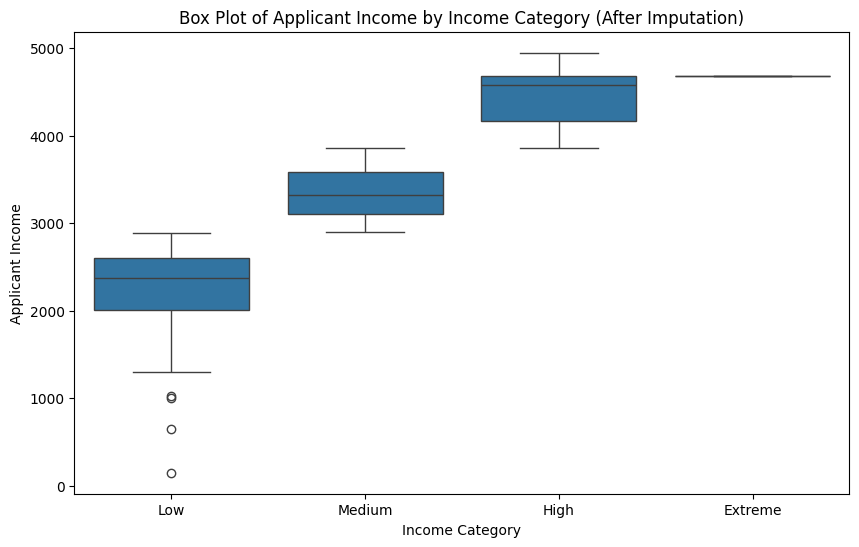

In [ ]:
# Create a box plot to check for outliers in the ApplicantIncome column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Category', y='ApplicantIncome', data=data2)

# Add title and labels
plt.title('Box Plot of Applicant Income by Income Category (After Imputation)')
plt.xlabel('Income Category')
plt.ylabel('Applicant Income')

# Show the plot
plt.show()

#### **Conclusion**
1. first, this is box plot of applicant income across income categories we made.
2. So, since extreme had lot of extreme values, so may be imputing with high df mean made the range of box plot above very small.

3. in this case, So in case of right skewed, its better to use capping, transformation rather than imputing. -->

4. this shows even though outliers are not there but extreme has lower variability and too much less variability is not good as it could get bias.


<Axes: xlabel='ApplicantIncome'>

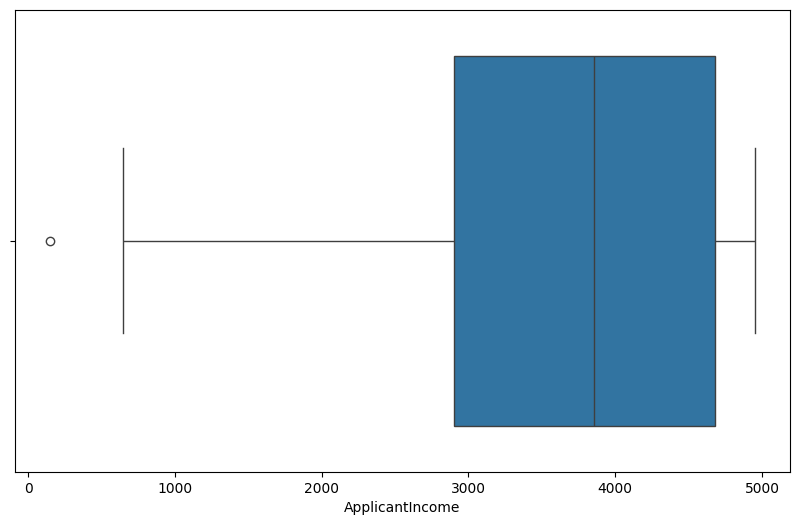

In [ ]:
# Create a box plot to check for outliers in the ApplicantIncome column only .
plt.figure(figsize=(10, 6))
sns.boxplot( x='ApplicantIncome',data=data2)


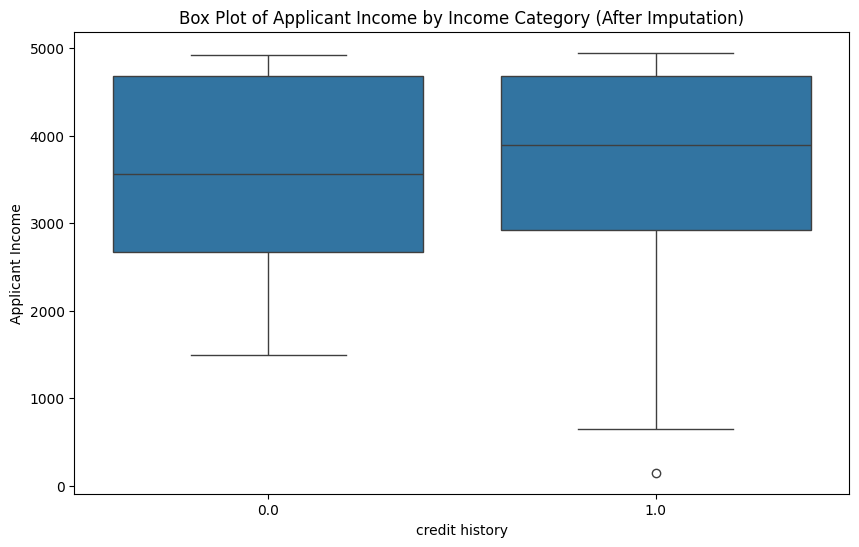

In [ ]:
# Create a box plot to check for outliers in the ApplicantIncome column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=data2)

# Add title and labels
plt.title('Box Plot of Applicant Income by Income Category (After Imputation)')
plt.xlabel('credit history')
plt.ylabel('Applicant Income')

# Show the plot
plt.show()

In [ ]:
# Cross tabulation for Income_Category, Credit_History, and Loan_Status
cross_tab = pd.crosstab(
    [data2['Income_Category'], data2['Credit_History']],  # Row: Income_Category and Credit_History
    data2['Loan_Status'],  # Column: Loan_Status
    margins=True  # Add row/column totals
)

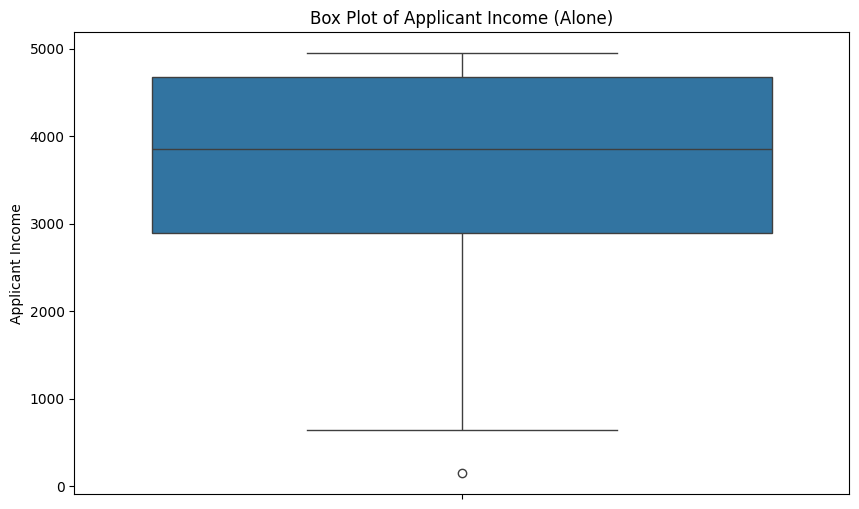

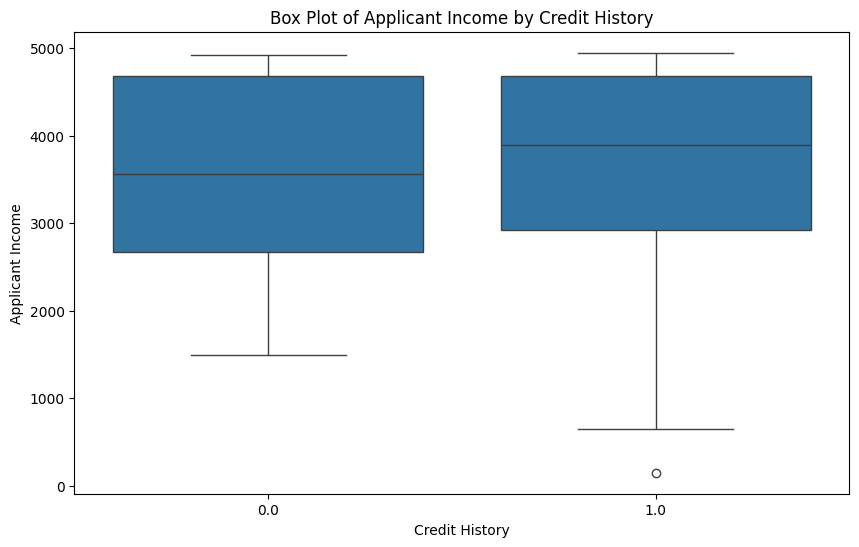

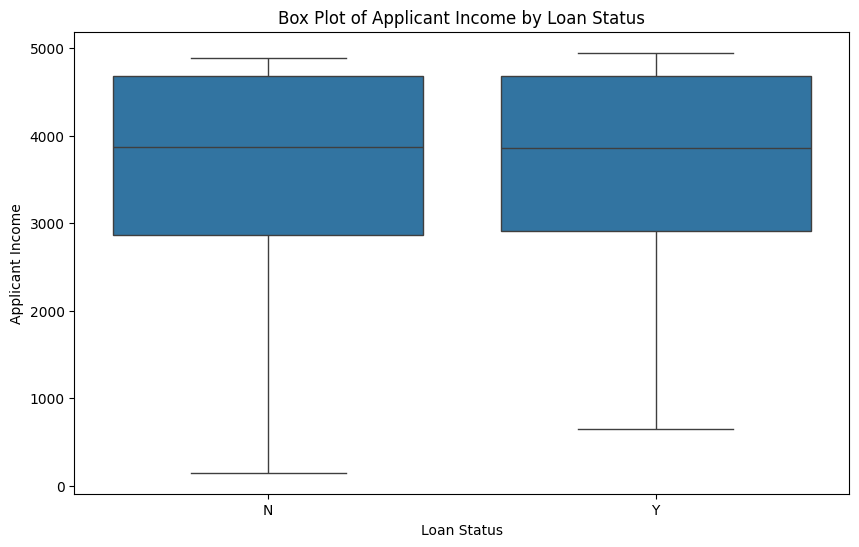

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for ApplicantIncome alone
plt.figure(figsize=(10, 6))
sns.boxplot(y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income (Alone)')
plt.ylabel('Applicant Income')
plt.show()

# Box plot for ApplicantIncome grouped by Credit_History
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History', y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Applicant Income')
plt.show()

# Box plot for ApplicantIncome grouped by Loan_Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data2)
plt.title('Box Plot of Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()



In [ ]:
# Calculate IQR for full ApplicantIncome column
Q1_full = data2['ApplicantIncome'].quantile(0.25)
Q3_full = data2['ApplicantIncome'].quantile(0.75)
IQR_full = Q3_full - Q1_full

# Calculate outlier bounds for the full data
lower_bound_full = Q1_full - 1.5 * IQR_full
upper_bound_full = Q3_full + 1.5 * IQR_full

# Identify outliers in the full dataset
full_outliers = data2[(data2['ApplicantIncome'] < lower_bound_full) | (data2['ApplicantIncome'] > upper_bound_full)]
print("Outliers in full dataset:", full_outliers)


Outliers in full dataset:       Loan_ID  Gender Married Dependents Education Self_Employed  \
25   LP001066    Male     Yes          0  Graduate           Yes   
54   LP001186  Female     Yes          1  Graduate           Yes   
67   LP001233    Male     Yes          1  Graduate            No   
106  LP001369    Male     Yes          2  Graduate            No   
119  LP001422  Female      No          0  Graduate            No   
128  LP001451    Male     Yes          1  Graduate           Yes   
144  LP001508    Male     Yes          2  Graduate            No   
148  LP001519  Female      No          0  Graduate            No   
152  LP001531    Male      No          0  Graduate            No   
157  LP001543    Male     Yes          1  Graduate            No   
164  LP001572    Male     Yes          0  Graduate            No   
189  LP001647    Male     Yes          0  Graduate            No   
199  LP001673    Male      No          0  Graduate           Yes   
210  LP001708  Female 

####**Final conclusion on loanstatus, applicant income and credit history analysis:**

In [ ]:
### lets first see the count: with outliers
#Differences in means or medians across categories can indicate a relationship
data.groupby('Loan_Status')['ApplicantIncome'].mean()

##without outliners
data2.groupby('Loan_Status')['ApplicantIncome'].mean() # hence now yes has relatively high income mean.

,ApplicantIncome
Loan_Status,
N,3671.364865
Y,3689.909639


###### **More better values could have been done to make the result look better.**

####**Conclusion:**
**data2**: no outliers and income category

**data**: has outlier and no income category col

####**Hypothesis testing 2:**

#### **Statistical Test: T-Test**(categorical and numerical)
**compare the means of ApplicantIncome between the two categories of Loan_Status, you can use a T-test.**

**Null Hypothesis:** There is no significant difference in applicant income between the two loan status groups.

**Alternative Hypothesis**: There is a significant difference in applicant income between the two loan status groups.

In [ ]:
import pandas as pd
from scipy import stats



# Split the data into two groups based on loan status
income_approved = data[data['Loan_Status'] == 'Y']['ApplicantIncome']
income_not_approved = data[data['Loan_Status'] == 'N']['ApplicantIncome']

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(income_approved, income_not_approved)

# Display results
print("T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in applicant income based on loan status.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in applicant income based on loan status.")


T-Test Results:
T-statistic: -0.9443118179785976
P-value: 0.34548738715837346

Fail to reject the null hypothesis: There is no significant difference in applicant income based on loan status.


#### **Conclusion:**
1. Fail to reject the null hypothesis: There is no significant difference in applicant income based on loan status.

####**Hypothesis3:**
1. **Null Hypothesis:** There is no significant difference in Loan amount between the two loan status groups.

2. **Alternative Hypothesis:** There is a significant difference in Loan Amount between the two loan status groups.

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'State', 'Zip'],
      dtype='object')

In [ ]:
import pandas as pd
from scipy import stats



# Split the data into two groups based on loan status
income_approved = data[data['Loan_Status'] == 'Y']['LoanAmount']
income_not_approved = data[data['Loan_Status'] == 'N']['LoanAmount']

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(income_approved, income_not_approved)

# Display results
print("T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference in applicant income based on loan Amount.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in applicant income based on loan Amount.")


T-Test Results:
T-statistic: -1.5727950958103765
P-value: 0.11642791040850191

Fail to reject the null hypothesis: There is no significant difference in applicant income based on loan Amount.


<Figure size 400x400 with 0 Axes>

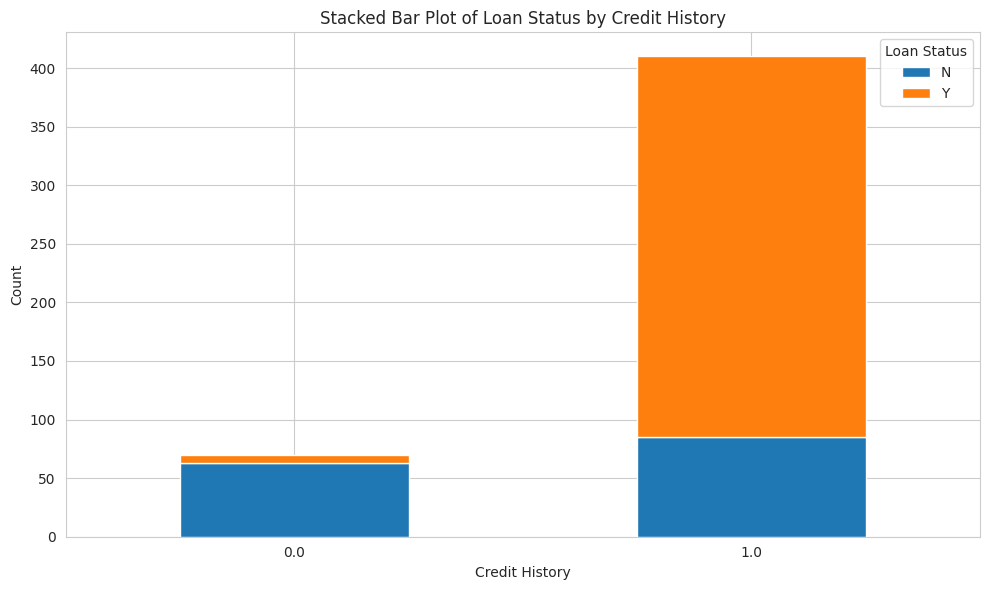

In [ ]:
cross_tab = pd.crosstab(data.Credit_History, data.Loan_Status)
plt.figure(figsize=(4, 4))
cross_tab.plot(kind='bar', stacked= True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


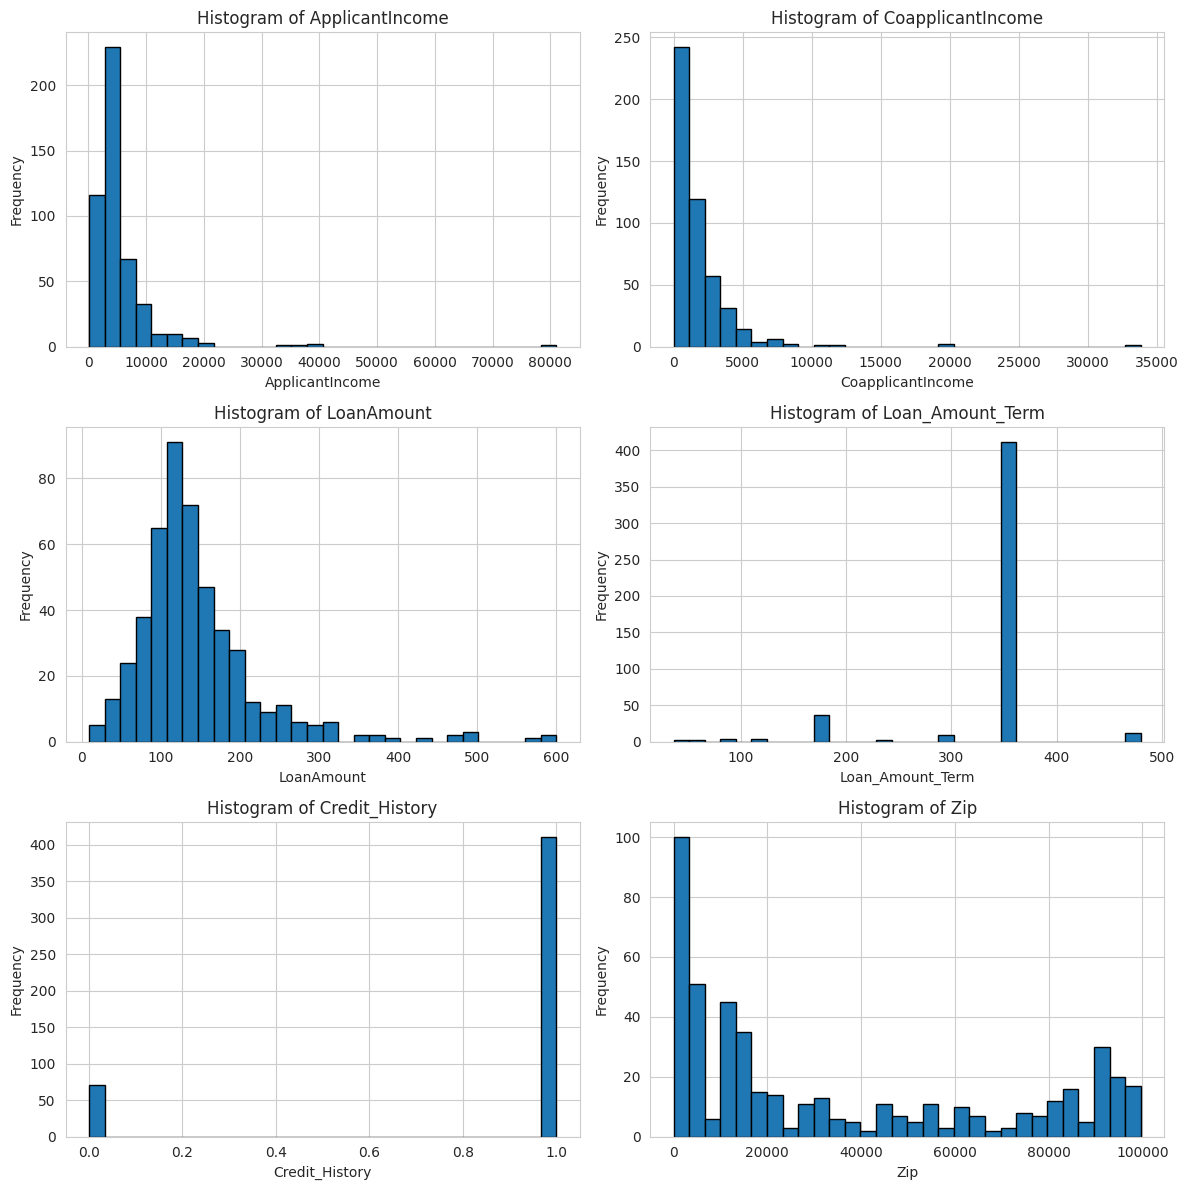

In [ ]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axes
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_vars + 1) // 2, ncols=2, figsize=(12, num_vars * 4 // 2), tight_layout=True)

# Flatten the axes array for easy iteration if there are more than 1 row
axes = axes.flatten()

# Plot histograms for each numerical column
for idx, column in enumerate(numerical_columns):
    axes[idx].hist(data[column], bins=30, edgecolor='black')
    axes[idx].set_xlabel(column)  # Set x-axis label to the name of the variable
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].grid(True)

# Hide any unused subplots
for idx in range(len(numerical_columns), len(axes)):
    axes[idx].axis('off')

plt.show()

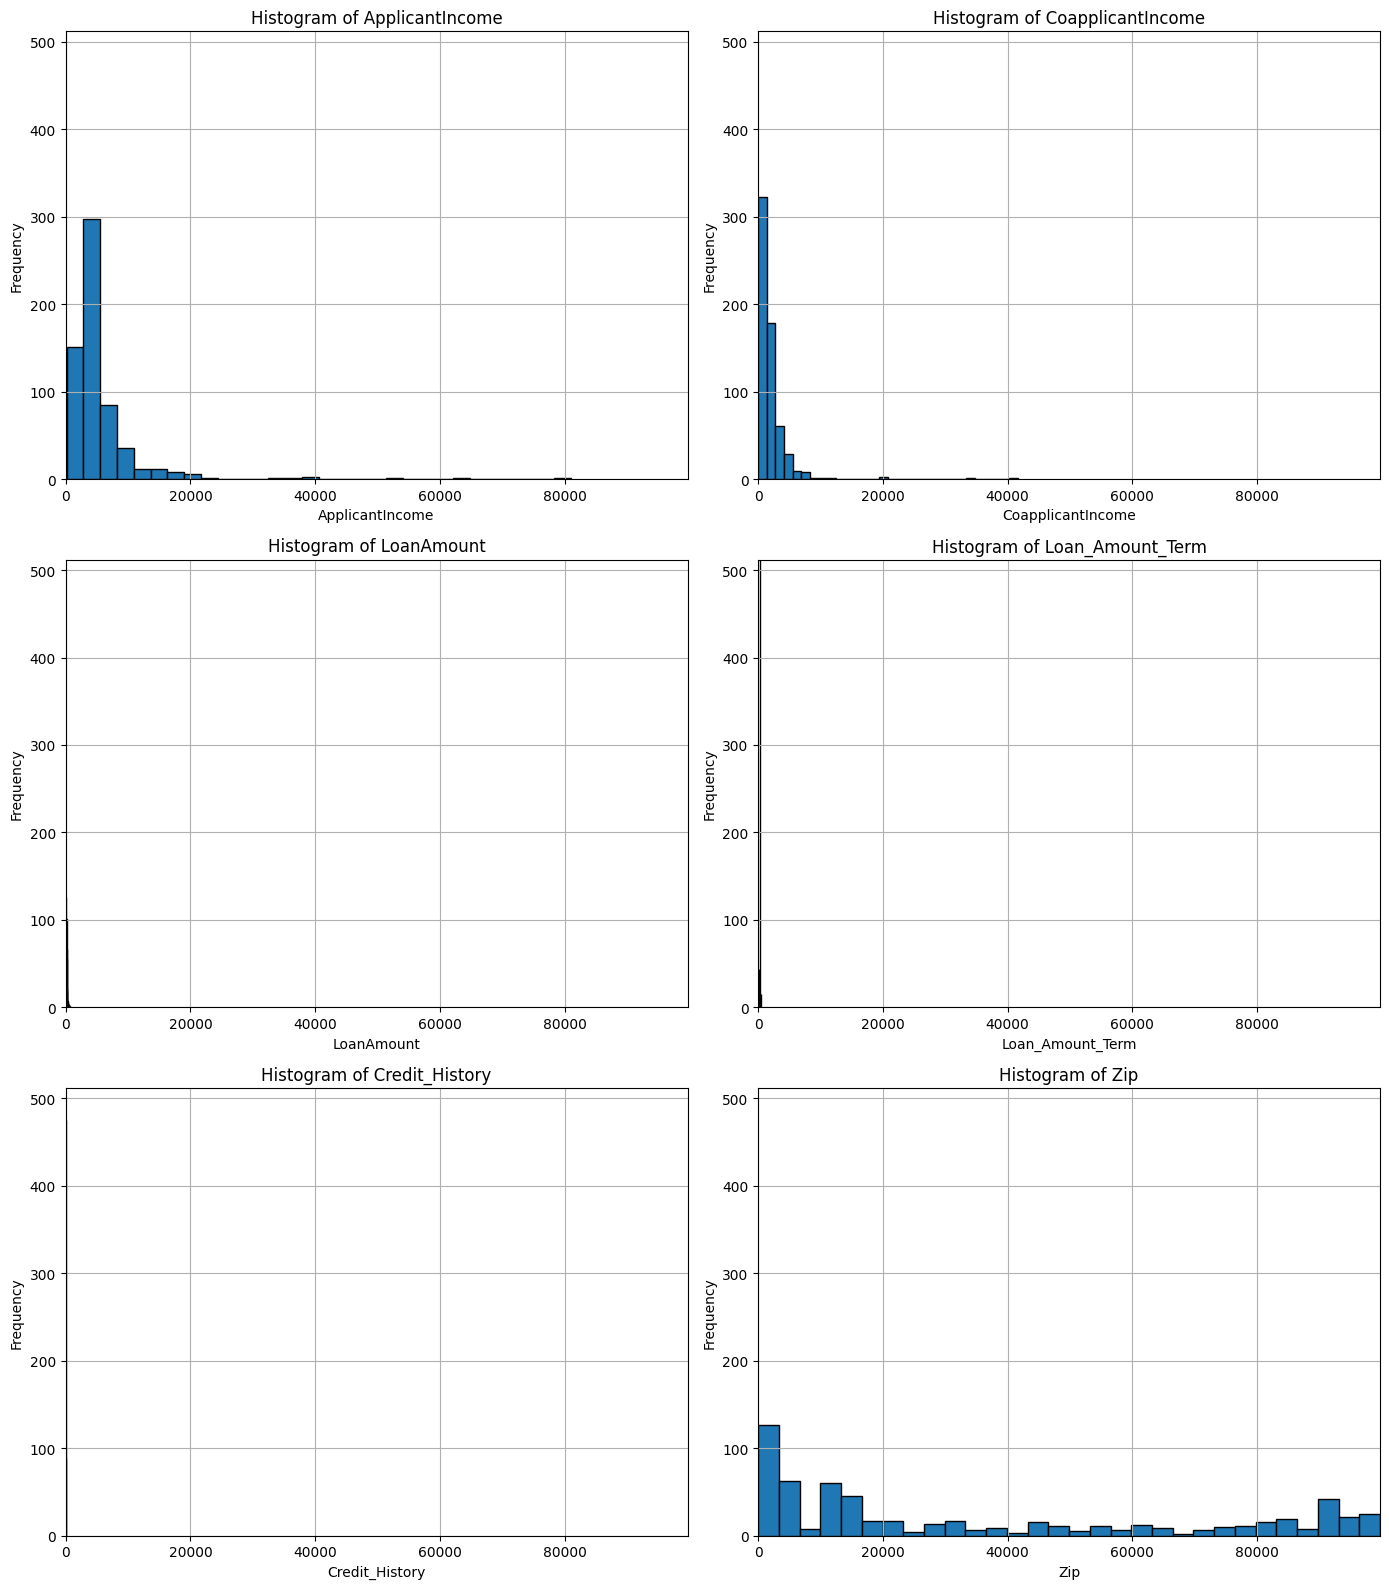

In [ ]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate global x-axis limits and y-axis limits for numerical columns
x_min = min(data[col].min() for col in numerical_columns)
x_max = max(data[col].max() for col in numerical_columns)
y_max = max(data[col].value_counts(bins=30).max() for col in numerical_columns)

# Set up the figure and axes
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_vars + 1) // 2, ncols=2, figsize=(14, (num_vars // 2 + 1) * 4), tight_layout=True)

# Flatten the axes array for easy iteration if there are more than 1 row
axes = axes.flatten()

# Plot histograms for each numerical column
for idx, column in enumerate(numerical_columns):
    axes[idx].hist(data[column], bins=30, edgecolor='black')
    axes[idx].set_xlabel(column)  # Set x-axis label to the name of the variable
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].set_xlim(x_min, x_max)  # Set x-axis limits
    axes[idx].set_ylim(0, y_max)  # Set y-axis limits
    axes[idx].grid(True)

# Hide any unused subplots
for idx in range(len(numerical_columns), len(axes)):
    axes[idx].axis('off')

plt.show()

#### **Conclusion**:
1. It seems there are outliers in the columns.

####

Global Outliers based on Modified Z-Score:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
9    LP001020    Male     Yes          1      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
54   LP001186  Female     Yes          1      Graduate           Yes   
67   LP001233    Male     Yes          1      Graduate            No   
106  LP001369    Male     Yes          2      Graduate            No   
115  LP001401    Male     Yes          1      Graduate            No   
128  LP001451    Male     Yes          1      Graduate           Yes   
138  LP001492    Male      No          0      Graduate            No   
144  LP001508    Male     Yes          2      Graduate            No   
146  LP001516  Female     Yes          2      Graduate            No   
155  LP001536    Male     Yes         3+      Graduate            No   
183  LP001637    Male     Yes          1      Graduate            No   
185  LP001640    Male

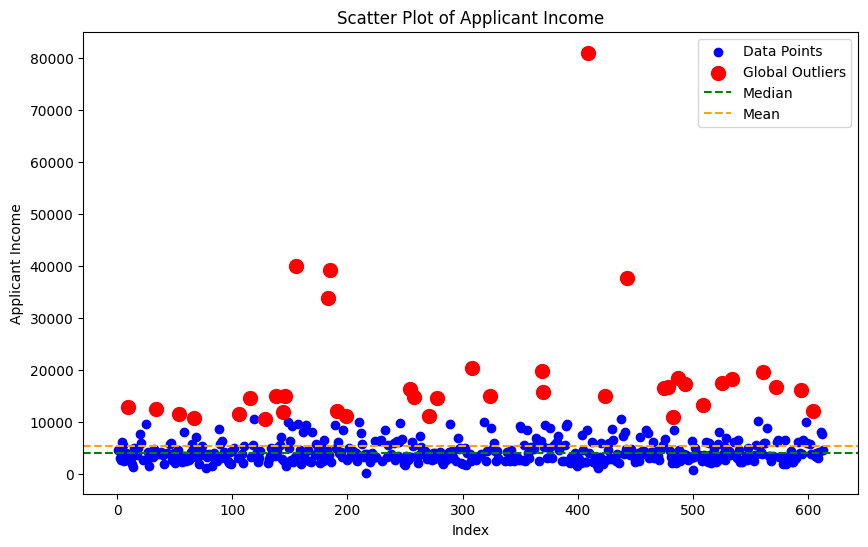

In [ ]:
import pandas as pd
from scipy.stats import median_abs_deviation

# Calculate Modified Z-Score
data['Modified_Z-Score'] = 0.6745 * (data['ApplicantIncome'] - data['ApplicantIncome'].median()) / median_abs_deviation(data['ApplicantIncome'])

# Identify global outliers
global_outliers_modified = data[abs(data['Modified_Z-Score']) > 3.5]

#print("Global Outliers based on Modified Z-Score:")
#print(global_outliers_modified)


plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data.index, data['ApplicantIncome'], color='blue', label='Data Points')
plt.scatter(global_outliers_modified.index, global_outliers_modified['ApplicantIncome'], color='red', label='Global Outliers', s=100)

plt.title('Scatter Plot of Applicant Income')
plt.xlabel('Index')
plt.ylabel('Applicant Income')
plt.axhline(y=data['ApplicantIncome'].median(), color='g', linestyle='--', label='Median')
plt.axhline(y=data['ApplicantIncome'].mean(), color='orange', linestyle='--', label='Mean')
plt.legend()
plt.show()



#### **Handling Outliers:**
Depending upon dataset outliers handled in diff way

a) we can apply drop : iqr, z scores(limitation: assumes normal distr of dataset)

b) cap them: replace extreme values with neaest sensible values with reasonable range. define a min/max and assign value to outlier

c) impute by median mean

d) scale/ Transformation: normalisation, log transformation
e) ensemble method


#### **Conclusion on outliers:**
1. Applicant income , credit history, co applicant, loanamount term has outliers

#### **Steps Before Transformation:**
*   Select important features considered important by analysis on  raw data.

*   Seperate independent(features)  and dependent(test data).

*   Apply train test split.












####**Features considering to use for models:**
1. Gender
2. Married
3. Dependents
4. Education
5. Self_Employed
6. Applicant Income(not effect loan status) and not considering loanamount as due to multicollinearity and provide same info to some extent.
7. credit history(imp feature)




#### **Target:**
1. Loan status: Y or N


#### **creating feature dataframe(independent var)**

#### **Features Dataframe**
1. Use Features as new dataframe which conatin all imp variables.
2. Will use features dataframe for transformation of categorical into numerical.

In [ ]:


# Separate the features
features = data2.drop(["Loan_ID", "State", "Income_Category", "LoanAmount", "Zip"], axis = 1)
features

target = data2["Loan_Status"]
target


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,4682,0.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,4682,4196.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,4682,240.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,4682,0.0,360.0,1.0,Urban,Y


In [ ]:
target = data2["Loan_Status"]
target

,Loan_Status
1,N
2,Y
3,Y
4,Y
5,Y
...,...
609,Y
610,Y
611,Y
612,Y


#### **TRAIN TEST SPLIT DATA**

In [ ]:
features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

####**Adding target col to feature col to make it as our final dataframe and then splitting it into 2 parts train and test**

In [ ]:
##adding target col to feature col to make it as our final dataframe and then splitting it into 2 parts train and test

features["Loan_Status"] = target
features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
new_features_df = features.copy()

#### **Categorical and numerical col in new_features_df**

In [ ]:
new_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   Loan_Amount_Term   480 non-null    float64
 8   Credit_History     480 non-null    float64
 9   Property_Area      480 non-null    object 
 10  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 45.0+ KB


In [ ]:

# Separate the features
features = data2.drop(["Loan_ID","State", "Income_Category", "LoanAmount", "Zip","Loan_Status"], axis = 1)
features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,4682,0.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,4682,4196.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,4682,240.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,4682,0.0,360.0,1.0,Urban


In [ ]:
categorical_columns = features.select_dtypes(include=['object']).columns
list(categorical_columns)

numerical_columns = features.select_dtypes(include=['int', 'float']).columns
list(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

In [ ]:
features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
list(categorical_columns)

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
features.shape

(480, 10)

In [ ]:
# Whole new_features_df  divided into train set and test
new_features_df = features.copy()
new_features_df["Loan_Status"] = target
new_features_df.columns

# providing whole dataset with target excluding some features which are not required in modl trainig but target is added here
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(new_features_df, test_size=0.2, random_state=42)





In [ ]:
new_features_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,4682,0.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,4682,4196.0,360.0,1.0,Urban,Y


In [ ]:
train_set

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
172,Male,Yes,3+,Not Graduate,No,3522,0.0,180.0,1.0,Rural,N
288,Female,No,0,Graduate,No,4124,0.0,360.0,1.0,Semiurban,Y
607,Male,Yes,2,Not Graduate,No,3987,1411.0,360.0,1.0,Rural,Y
55,Male,Yes,2,Graduate,No,2708,1167.0,360.0,1.0,Semiurban,Y
461,Male,Yes,3+,Graduate,No,4682,0.0,180.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
141,Male,No,0,Graduate,No,4682,0.0,360.0,1.0,Urban,Y
350,Male,Yes,0,Graduate,No,4682,0.0,360.0,1.0,Semiurban,Y
445,Male,Yes,1,Graduate,Yes,3466,1210.0,360.0,1.0,Rural,Y
558,Male,Yes,0,Graduate,No,3887,2669.0,360.0,1.0,Semiurban,Y


In [ ]:
train_set.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# use to get score by comparing both pred y and actual y_train
test_set

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
92,Male,Yes,2,Not Graduate,No,3273,1820.0,360.0,1.0,Urban,Y
529,Male,No,0,Not Graduate,No,4682,0.0,360.0,1.0,Semiurban,Y
505,Male,Yes,2,Graduate,No,3510,4416.0,360.0,1.0,Rural,Y
358,Male,Yes,0,Not Graduate,No,3000,1666.0,480.0,0.0,Urban,N
512,Male,Yes,2,Graduate,No,3283,2035.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
281,Male,Yes,0,Graduate,No,3927,800.0,360.0,1.0,Semiurban,Y
299,Male,Yes,1,Graduate,No,2014,2925.0,360.0,1.0,Urban,N
522,Male,Yes,3+,Graduate,Yes,4682,1424.0,360.0,1.0,Rural,Y
33,Male,Yes,0,Graduate,No,3500,1667.0,360.0,1.0,Semiurban,Y


In [ ]:
test_set.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### **Conclusion:**


* Train data(x_train, y_train) for model training  both contain 384 rows abd 11 columns.

* Test data(features + target)contain 96 rows and 11 columns






###**Tansformation**:

Process:



*   After split, train data is seperated as independent and test: ie 2 dataframes created from train data(X_train) such that we get fetaures and target seperated from it.

*  Similarly on Test data(x_test) we seperate all indepedent fetaures and target column.

*   Transform preprocessor(encoding)  will be applied to Features of x_train


*   List item




#### **Seperating features and target from train set and test set**

In [ ]:
# seperating x features and y target from splitted x train data(used for training)
# seperating x features and y target  column from splitted test data (which will be used for predicting)
# NOte: only data with all features in test or train  is used for transformation

# Train_set df features and target
input_feature_train_df=train_set.drop(columns=["Loan_Status"],axis=1)
target_feature_train_df=train_set["Loan_Status"]

#Test_set df features and target

input_feature_test_df=test_set.drop(columns=["Loan_Status"],axis=1)
target_feature_test_df=test_set["Loan_Status"]




In [ ]:
input_feature_train_df.columns  # without target col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
input_feature_train_df.shape

(384, 10)

In [ ]:
input_feature_test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
92,Male,Yes,2,Not Graduate,No,3273,1820.0,360.0,1.0,Urban
529,Male,No,0,Not Graduate,No,4682,0.0,360.0,1.0,Semiurban
505,Male,Yes,2,Graduate,No,3510,4416.0,360.0,1.0,Rural
358,Male,Yes,0,Not Graduate,No,3000,1666.0,480.0,0.0,Urban
512,Male,Yes,2,Graduate,No,3283,2035.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
281,Male,Yes,0,Graduate,No,3927,800.0,360.0,1.0,Semiurban
299,Male,Yes,1,Graduate,No,2014,2925.0,360.0,1.0,Urban
522,Male,Yes,3+,Graduate,Yes,4682,1424.0,360.0,1.0,Rural
33,Male,Yes,0,Graduate,No,3500,1667.0,360.0,1.0,Semiurban


In [ ]:
# test data all features df
input_feature_test_df.shape

(96, 10)

####**Before splitting data into train and test,check  "Data imbalance"**:
1. Since data imbalance can  effect model accuracy.

2. Sometimes even the accuracy is high, but confusion matrix shows high number of type1 and type2 error which means  model predicted it wrong and so we say variance increases.

3. u get biased results.


In [ ]:
target_feature_train_df

,Loan_Status
172,N
288,Y
607,Y
55,Y
461,Y
...,...
141,Y
350,Y
445,Y
558,Y


In [ ]:
# train data target features containg only loan status
target_feature_train_df.shape

(384,)

In [ ]:
# test data target df(only loan status)
target_feature_test_df.shape

(96,)

### fter splittuing lets create pipeleine
1. write down list of cat colums and num columns
2. pipeline steps: onehotencodeing, numerical column/: nothing

3. us eit on categorival data


In [ ]:
## categorical


In [ ]:
categorical_columns = features.select_dtypes(include=['object']).columns
list(categorical_columns)

numerical_columns = features.select_dtypes(include=['int', 'float']).columns
list(numerical_columns)

In [ ]:
categorical_columns = features.select_dtypes(include=['object']).columns
list(categorical_columns)


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
##catg columns
catag_column1 = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']


 ## applying to catg col



In [ ]:
# Create a pipeline for one-hot encoding
pipeline = Pipeline(steps=[
    ('onehotencoding', OneHotEncoder(drop='first'))
])

# Fit and transform the categorical data
encoded_data = pipeline.fit_transform(data[catag_column])
encoded_data


<480x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1415 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


# Categorical columns


# Create a pipeline for one-hot encoding
pipeline = Pipeline(steps=[
    ('onehotencoding', OneHotEncoder(sparse=False, drop='first'))  # drop='first' avoids dummy variable trap
])

# Fit and transform the categorical data
encoded_data = pipeline.fit_transform(data[catag_column])

# Print the shape of the encoded data
print("Shape of encoded data:", encoded_data.shape)

# Get feature names after one-hot encoding
feature_names = pipeline.named_steps['onehotencoding'].get_feature_names_out(catag_column)

# Convert the output to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Display the encoded DataFrame
print(encoded_df)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# input x train data
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



# Create a pipeline for one-hot encoding
pipeline = Pipeline(steps=[
    ('onehotencoding', OneHotEncoder(sparse_output=False, drop='first'))  # Use sparse_output instead of sparse
])

# Fit and transform the categorical data
encoded_data = pipeline.fit_transform(input_feature_train_df[catag_column1])

# Print the shape of the encoded data
print("Shape of encoded data:", encoded_data.shape)

# Get feature names after one-hot encoding
feature_names = pipeline.named_steps['onehotencoding'].get_feature_names_out(catag_column1)

# Convert the output to a DataFrame
encoded_train_x = pd.DataFrame(encoded_data, columns=feature_names)

# Display the encoded DataFrame
print(encoded_train_x)


Shape of encoded data: (384, 9)
     Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0            1.0          1.0           0.0           0.0            1.0   
1            0.0          0.0           0.0           0.0            0.0   
2            1.0          1.0           0.0           1.0            0.0   
3            1.0          1.0           0.0           1.0            0.0   
4            1.0          1.0           0.0           0.0            1.0   
..           ...          ...           ...           ...            ...   
379          1.0          0.0           0.0           0.0            0.0   
380          1.0          1.0           0.0           0.0            0.0   
381          1.0          1.0           1.0           0.0            0.0   
382          1.0          1.0           0.0           0.0            0.0   
383          1.0          1.0           0.0           1.0            0.0   

     Education_Not Graduate  Self_Employed_Yes  Propert

In [ ]:
## input train

In [ ]:
#train x features transformation
# categorical data
# input_feature_train_df## indepensdnet

## splitting train and test data into target and indepemndenet columns
independ

####**More Steps to Feature engineering:**


* Feature Transforming
* Feature encoding categorical

* Feature selection





#### **Feature Transformation : categorical and numerical**


Why transformation of features are required?


*   Linear Regression -- Gradient Distance---  Global Minima
*   Algorithms like KNN, Decision Tree, Random Forest, Hierarichal Clustering--- Eucleadean Distance

*  Every point has some vectors and direction

*   Deep Learning Techniques(Standarization, Scaling) 1. ANN -->Global Minima, gradient descent

Why we need Transformation?
ans: diff features are represented or measured in diff units: cm, pixel, m

So, in algorithms that use gradient descent, converging at a point gets easier if data is transormed to same units, otherwise it takes time to converge towards fglobal minima.

In decision tree and all where we require eucleadean concepts , there also we require transformation


Type of Transformation:

*   Normalisation and Standarization
*   scaling to min and max values



*   Scaling to Median and Quantiles




*  Square Rooot Trabsformation
*  Exponential Transformation


*   Guassian Transformation

*   Logarthmic Transformation
*   Reciprocal Transformation
*  Box Cox Transformation


######**Always do transformation after train and test split.**



NOTE: For train x : use fit_transform
      For test/ target col : transform









#####Standardization or scaling is often performed in classification problems, especially when using algorithms that are sensitive to the scale of the data.

Algorithms Sensitive to Scale:

Logistic Regression: It uses gradient descent to optimize the loss function, so features with different scales can affect convergence.
K-Nearest Neighbors (KNN): Distance calculations are sensitive to the scale of the features.
Support Vector Machines (SVM): Similar to KNN, SVM uses distance metrics that can be skewed by differing scales.
Neural Networks: Performance can improve with scaled features since activation functions like sigmoid can saturate with large values.
Distance-Based Algorithms:

For algorithms that rely on distance metrics (like KNN and SVM), scaling ensures that all features contribute equally to the distance calculations.


**Methods of Scaling**
1. Standardization: Used wen input data set have large diff between ranges or wen measured in diff units.centres mean = 0
Standardizes features by removing the mean and scaling to unit variance.
Useful when features follow a Gaussian distribution.
2. Min-Max Scaling: scales to values between 0 to 1
Scales features to a fixed range.
Useful when you want to ensure all features are on the same scale without assuming a normal distribution.
3. Robust Scaling:they are robust to  Outliers. It scales the features to median and quantiles..

Standardization or scaling is crucial in many classification problems, particularly when using algorithms that are sensitive to feature scales. It helps improve model performance, convergence speed, and overall effectiveness.

#### **Transformation on basis od data Distribution :**
**Gaussian Transformation: linear and logitsic condiders features are normally distr accuracy-performance improves**

**Techniques for distribution(right skewed, left skewed) change to normal/gaussian distribution will help to improve accuracy-performance**



*   Logarithimic transformation

*   Reciprocal transformation

*   Square root transformation
*   Exponential Transformation


*   Box cox Transformation






##### **Feature Engineering  Encoding Techniques: Converting catagorical to numerical****



*  **One hot encoding**: Disadvantage when large number of categories in a column.






In [ ]:
# transforming(hot encoding)
#["Gender", "Married","Dependents", "Education", "Self_Employed","Property_Area", "Loan_Status"]

dat = pd.get_dummies(features,["Gender", "Married","Dependents", "Education", "Self_Employed","Property_Area", "Loan_Status"],drop_first=True)


 #Convert boolean columns to integer
bool_cols = dat.select_dtypes(include=['bool']).columns
dat[bool_cols] = dat[bool_cols].astype(int)
dat

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,4682,240.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,4682,0.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [ ]:
dat.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


## **check imbalance**

In [ ]:
dat.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [ ]:
### lets see the count of loan statau
dat["Loan_Status_Y"].value_counts()

,count
Loan_Status_Y,
1,332
0,148


In [ ]:
# Calculate the proportion of each value in Loan_Status_Y
loan_status_proportion = dat["Loan_Status_Y"].value_counts(normalize=True) * 100
print(loan_status_proportion)


Loan_Status_Y
1    69.166667
0    30.833333
Name: proportion, dtype: float64


#### Conclusion on Imbalance:
1. In imbalanced datasets, models tend to perform well for the majority class because there is more data available for that class. However, they might struggle with the minority class due to the lack of sufficient data. This can result in a model that is good at predicting loans that will be approved but performs poorly in identifying loans that should be rejected.

2. Here, approved loan(1) has majority then not approved loan(0), model might get biased and predict mostly non approved as appproved, which somtines gives good accuracy but in confusion  matrix, false posiive and negative effected.

3.  approved loans (1) are the majority, the model is more likely to predict 1 (approved) even when the actual label is 0 (not approved). This leads to an increase in false positives (Type 1 error) because
A false positive happens when the model predicts 1 (approved), but the actual class is 0 (not approved).

4. false positive( predicted positive(1) but actual 0)

#### **Techniques to overcome Imbalance**
** consider techniques like:**

1. **Cross-Validation:**
In cross-validation, the dataset is split into multiple subsets (folds), and the model is trained on different combinations of the data.
Stratified K-Fold Cross-Validation ensures that the proportion of each class is maintained in every fold, which helps provide a more balanced evaluation.This technique prevents overfitting to the majority class by ensuring the model performs well on unseen data.
2. **Oversampling** the minority class.
2. **Undersampling** the majority class.
3. Using algorithms that are robust to imbalance (like Random Forest or XGBoost).
4. **Hypertuning Methods**: Adjusting class weights during model training.




#### **Method 1:Cross Validation with hypertuning**

####**Method1: Cross validation method  with hypertuning to overcome imbalnce and overfitting used during train test split.**

## **train test split**:
splitting using cross validation k fold.



In [ ]:
dat.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,4682,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,4682,4196.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


####** Seperating targetand categorical column**

In [ ]:
### independent and dependent
features = dat.drop(["Loan_Status_Y"], axis = 1)

target = dat[["Loan_Status_Y"]]

###**Need to change dim of target value**

In [ ]:
target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
### logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.model_selection import train_test_split

### independent and dependent
features = dat.drop(["Loan_Status_Y"], axis = 1)

target = dat[["Loan_Status_Y"]]
target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()



X_train, X_test, y_train, y_test = train_test_split(features, target_change, train_size=0.7)


# defing logistic regression
log_class = LogisticRegression()
grid = {"C" : 10.0 **np.arange(-2,3), "penalty": ["l2"]}

## cross validation used on train data
cv = KFold(n_splits = 5, random_state = None, shuffle = False) # xtrain/5 = train + vslid and score 5 times



## fiting into model
clf = GridSearchCV(log_class, grid, cv = cv, n_jobs = -1, scoring= "f1_macro")
clf.fit(X_train, y_train)


## predicting
y_pred2 = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))


[[ 11  29]
 [  4 100]]
0.7708333333333334
              precision    recall  f1-score   support

           0       0.73      0.28      0.40        40
           1       0.78      0.96      0.86       104

    accuracy                           0.77       144
   macro avg       0.75      0.62      0.63       144
weighted avg       0.76      0.77      0.73       144



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
### logistic regression
log_class = LogisticRegression()
grid = {"C" : 10.0 **np.arange(-2,3), "penalty": ["l2"]}

## cross validation used on train data
cv = KFold(n_splits = 5, random_state = None, shuffle = False) # xtrain/5 = train + vslid and score 5 times

## lets apply cv on train data sep into train and validation and then using test
#train_test_split is the function we imported and will use to split the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target_change, train_size=0.7)


clf = GridSearchCV(log_class, grid, cv = cv, n_jobs = -1, scoring= "f1_macro")
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']},
             scoring='f1_macro')

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 15  20]
 [  2 107]]
0.8472222222222222
              precision    recall  f1-score   support

           0       0.88      0.43      0.58        35
           1       0.84      0.98      0.91       109

    accuracy                           0.85       144
   macro avg       0.86      0.71      0.74       144
weighted avg       0.85      0.85      0.83       144



In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20 22]
 [ 4 98]]
0.8194444444444444
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        42
           1       0.82      0.96      0.88       102

    accuracy                           0.82       144
   macro avg       0.82      0.72      0.74       144
weighted avg       0.82      0.82      0.80       144



### **conclusion**
1. 0, 0 = 20(TN) , 1,1(TP)= 98, FP = 22(0 predicted as 1), FN = 4(1 predicted AS 0)

2. **Class 0:**
**Precision (0.83):**

Out of all instances predicted as class 0, 83% were actually class 0. This is a good precision score, indicating that when the model predicts class 0, it is mostly correct.
Recall (0.48):

This means that out of all actual class 0 instances, only 48% were correctly identified by the model. This is relatively low, indicating that many instances of class 0 are being misclassified as class 1 (as indicated by the 22 false positives).
F1-Score (0.61):

The F1-score combines precision and recall into a single metric, and in this case, it's moderately low, reflecting the trade-off between precision and recall.


**2. Class 1:**
Precision (0.82):

For class 1, 82% of instances predicted as class 1 were correct. This is also a good score, indicating that the model is reliable when it predicts class 1.
Recall (0.96):

The model correctly identifies 96% of the actual class 1 instances. This is an excellent recall score, indicating that the model is very effective at identifying class 1 instances, with only 4 false negatives.
F1-Score (0.88):

This score is high, reflecting a good balance between precision and recall for class 1.


3. F1 SCORE OF 1 > F1 SCORE OF 0 , IT might be imbalance

#### Efect of model predictions on loan:
**Misclassification Risk:** : **increasing defaults**

The recall for not-approved loans (class 0) is 48%, meaning less than half of actual not-approved loans are correctly identified. This leads to many loans that should be denied being incorrectly classified as approved (class 1), increasing the risk of defaults.

**Precision Insights for 0:**(total negative out of all predicted 0 not actuall 0)

Although precision for class 0 is 83%, indicating that when a loan is predicted as not approved, it is usually correct, the low recall highlights a failure to capture many at-risk loans.



**Solution:**

**Focus on Improving Recall:**
Enhancing recall for class 0 is essential to reduce the number of defaults. A higher recall means more actual not-approved loans are correctly identified, protecting the financial institution from losses and ensuring responsible lending.
Summary
Prioritizing recall for not-approved loans is vital in your model to minimize the risk of approving risky loans and safeguard the institution's financial health. This focus aligns with responsible lending practices.

#### **Method2: Random forest with cross validation(cv) and hyperparameter tuning**

1.  Using Random forest with cv and hyperparameter to decrease effect of imbalance dataset on model prediction. Ensemble methods like Randon forest are robust to imbalnce and can work still well. By employing Random Forest with cross-validation and hyperparameter tuning, you can effectively address the challenges of class imbalance.

2. This approach enhances the model's ability to accurately predict both approved and not-approved loans, thereby reducing the risk of defaults and improving overall predictive accuracy.

In [ ]:
## random forest test for imbalance.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[21 26]
 [11 86]]
0.7430555555555556
              precision    recall  f1-score   support

           0       0.66      0.45      0.53        47
           1       0.77      0.89      0.82        97

    accuracy                           0.74       144
   macro avg       0.71      0.67      0.68       144
weighted avg       0.73      0.74      0.73       144



In [ ]:
## random forest test for imbalance.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[18 17]
 [11 98]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.62      0.51      0.56        35
           1       0.85      0.90      0.88       109

    accuracy                           0.81       144
   macro avg       0.74      0.71      0.72       144
weighted avg       0.80      0.81      0.80       144



#### **Conclusion on Rf**:
1. didnot worked well with random forest as false negative and false positive increased.


#### **Rf with n estimator = 100**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22 25]
 [ 9 88]]
0.7638888888888888
              precision    recall  f1-score   support

           0       0.71      0.47      0.56        47
           1       0.78      0.91      0.84        97

    accuracy                           0.76       144
   macro avg       0.74      0.69      0.70       144
weighted avg       0.76      0.76      0.75       144



Model accuracy score with 100 decision-trees : 0.7500
Confusion Matrix for Random Forest:
[[21 26]
 [10 87]]


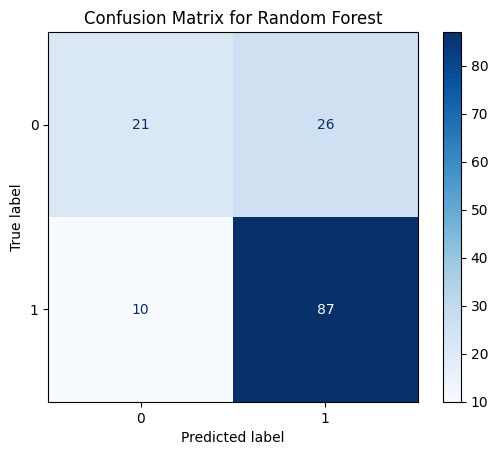

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_100)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels= rfc_100.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

#### **Feature Importance**

#### **model may not be working well due to large number of independent variables**

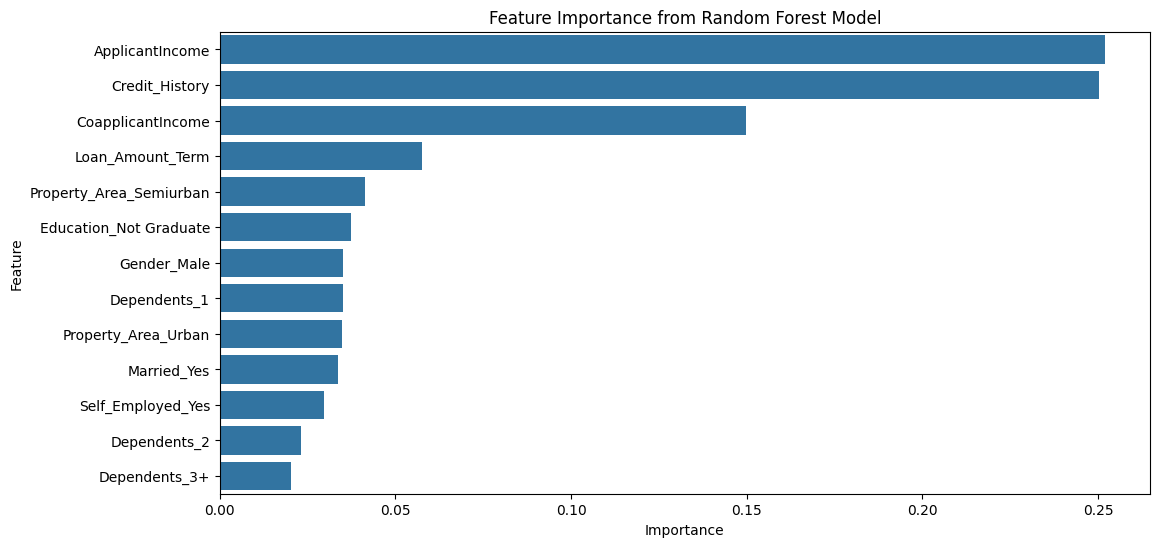

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assume you have your data loaded into trainX and trainY
# Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **Trainig the RF  model with only 4 important features**

In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame using transformed "dat" data frame with only the top 4 features
feature_new = dat[top_features]

# Display the new DataFrame
feature_new

,Credit_History,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term
1,1.0,4583,1508.0,360.0
2,1.0,3000,0.0,360.0
3,1.0,2583,2358.0,360.0
4,1.0,4682,0.0,360.0
5,1.0,4682,4196.0,360.0
...,...,...,...,...
609,1.0,2900,0.0,360.0
610,1.0,4106,0.0,180.0
611,1.0,4682,240.0,360.0
612,1.0,4682,0.0,360.0


In [ ]:
### target df

target = dat[["Loan_Status_Y"]]
target_change = target.values.flatten()
target_change

feature_new.shape, target_change.shape


((480, 4), (480,))

#### **split data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_new, target_change, train_size=0.7)

####**Model 2: using 4 variable into Random Forest model with 100 estimators**

Model accuracy score with 100 decision-trees : 0.8056
Confusion Matrix for Random Forest:
[[28 21]
 [ 7 88]]


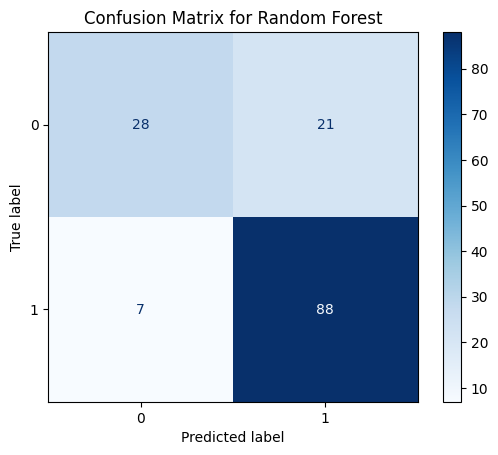

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_100)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels= rfc_100.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

### **Model 4: logistic regression with 4 variables and trained with k fold**

In [ ]:
### using train x with cross validation to train model and then tested with testy
#### train x and test x was splitted earlier using train test
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

#
# Initialize KFold cross-validator
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Perform cross-validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold_validation)

# Print cross-validation results
print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())
print("Standard deviation:", cv_results.std())

# Fit the model on the scaled training data
model.fit(X_train, y_train)

# Evaluate on the scaled testing data
test_accuracy = model.score(X_test, y_test)  # Ensure testY is also 1D
print("Test accuracy:", test_accuracy)


## confusion matrix , report
y_pred= model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Cross-validation results: [0.82352941 0.85294118 0.85294118 0.79411765 0.76470588 0.76470588
 0.87878788 0.72727273 0.81818182 0.81818182]
Mean accuracy: 0.8095365418894831
Standard deviation: 0.04464706917839262
Test accuracy: 0.8055555555555556
[[22 27]
 [ 1 94]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.96      0.45      0.61        49
           1       0.78      0.99      0.87        95

    accuracy                           0.81       144
   macro avg       0.87      0.72      0.74       144
weighted avg       0.84      0.81      0.78       144



In [ ]:
#### model logistic regression with 4 variables

from sklearn.linear_model import LogisticRegression
# Initial the model and fit the model.
lr = LogisticRegression()
lr.fit(X_train,y_train)


pred_lr = lr.predict(X_test)
print(pred_lr)



#Performance on training set
print(lr.score(X_train,y_train))
# Performance on test set
# score function will automatically predict for testX and then compare with true value
print(lr.score(X_test,y_test))



# "labels" option defines the order - the order of rows will follow the orders in the "labels".
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
metrics.confusion_matrix(y_pred=pred_lr, y_true=y_test, labels = [0, 1])

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
0.8095238095238095
0.8055555555555556


array([[22, 27],
       [ 1, 94]])

#### **Logistic regression with 13 variables**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initial the model and fit the model.
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

##

In [ ]:
pred_lr = lr.predict(testX)
print(pred_lr)

[1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0]


In [ ]:
#Performance on training set
print(lr.score(trainX,trainY))
# Performance on test set
# score function will automatically predict for testX and then compare with true value
print(lr.score(testX,testY))

0.8083333333333333
0.8333333333333334


In [ ]:
# "labels" option defines the order - the order of rows will follow the orders in the "labels".
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
metrics.confusion_matrix(y_pred=pred_lr, y_true=testY, labels = [1, 0])

array([[81,  2],
       [18, 19]])

#### model3: **decision tree with 4 variable**

In [ ]:
# DEFINE EMPTY MODEL
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
# To avoid a very large tree, we can set the max_depth to control the size of tree



# Create Decision Tree classifer object
# To avoid a very large tree, we can set the max_depth to control the size of tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)



# dt = DecisionTreeClassifier(max_depth=3)
# dt.fit(trainX,trainY)

# Performance on training set
#print(dt.score(X_train,y_train))

# Performance on test set
# score function will automatically predict for testX and then compare with true value
print(dt.score(X_test, y_test))


pred_dt = dt.predict(X_test)

 #"labels" option defines the order - the order of rows will follow the orders in the "labels".
metrics.confusion_matrix(y_pred=pred_dt, y_true=y_test, labels = [0, 1])

0.7916666666666666


array([[23, 26],
       [ 4, 91]])

####**scaling the train data after data got splitt for increasing accuracyand then using cv method to train data**

#### **incorporate techniques for handling imbalanced data during the tuning process.**

In [ ]:
# Scale features(train x and test data testx )
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize KFold cross-validator
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Perform cross-validation
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold_validation)

# Print cross-validation results
print("scaled k fold Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())
print("Standard deviation:", cv_results.std())

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate on the scaled testing data
test_accuracy = model.score(X_test_scaled, y_test)
print("Test accuracy:", test_accuracy)


y_pred= model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

scaled k fold Cross-validation results: [0.82352941 0.85294118 0.85294118 0.79411765 0.76470588 0.76470588
 0.87878788 0.72727273 0.81818182 0.81818182]
Mean accuracy: 0.8095365418894831
Standard deviation: 0.04464706917839262
Test accuracy: 0.8055555555555556
[[22 27]
 [ 1 94]]
0.8055555555555556
              precision    recall  f1-score   support

           0       0.96      0.45      0.61        49
           1       0.78      0.99      0.87        95

    accuracy                           0.81       144
   macro avg       0.87      0.72      0.74       144
weighted avg       0.84      0.81      0.78       144



In [ ]:
### model with 4 variables
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay

# # Initialize the Random Forest model
# rfc_100 = RandomForestClassifier(random_state=42)

# # Standardize the data (if not already done)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test_scaled)

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'class_weight': ['balanced', None]  # Use 'balanced' to handle class imbalance
# }

# # Set up Grid Search
# grid_search = GridSearchCV(estimator=rfc_100, param_grid=param_grid,
#                            scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# # Fit Grid Search
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Train the Random Forest model with the best parameters
# best_rf = grid_search.best_estimator_

# # Predict on the test set
# y_pred_100 = best_rf.predict(X_test_scaled)

# # Check accuracy score
# print('Model accuracy score with best Random Forest model: {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))

# # Compute confusion matrix
# conf_matrix_rf = confusion_matrix(y_test, y_pred_100)
# print("Confusion Matrix for Random Forest:")
# print(conf_matrix_rf)

# # Display confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=best_rf.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix for Random Forest")
# plt.show()

# # Classification report
# print(classification_report(y_test, y_pred_100))


#### **Method 3:** **Adding class weight**

#### **Model 3: Random Forest(4 variables)  with added class weight**

##### ## **case1 : since 0 is less inour case so asking to give 0 more importance than 1**

In [ ]:
## case1 : since 0 is less inour case so asking to give 0 more importance than 1
class_weight = dict({0: 100, 1: 1})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[32 17]
 [20 75]]
0.7430555555555556
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        49
           1       0.82      0.79      0.80        95

    accuracy                           0.74       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.75      0.74      0.74       144



#### **Case2: class weight added for 1 more importance as exp to see which works better.**


In [ ]:
class_weight = dict({0 : 1, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 18]
 [ 6 89]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.84      0.63      0.72        49
           1       0.83      0.94      0.88        95

    accuracy                           0.83       144
   macro avg       0.83      0.78      0.80       144
weighted avg       0.83      0.83      0.83       144



#### **Conclusion**

1. case 2 when giving importance to class 1 worked better then case 1 when 0 was given importance

2. case2  works better because it aligns with your data distribution and problem goals.

In [ ]:
class_weight = dict({1 : 300, 1 : 100})
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[31 18]
 [ 9 86]]
0.8125
              precision    recall  f1-score   support

           0       0.78      0.63      0.70        49
           1       0.83      0.91      0.86        95

    accuracy                           0.81       144
   macro avg       0.80      0.77      0.78       144
weighted avg       0.81      0.81      0.81       144



####**Conclusion on class weight**

1. Adding class weight parameter to random forest, **drastically reduced false positive (from 22 to 18) making recall for 0(not approved) increase from .45 to .63** thus precison and recall both are balanced this time. last time, precison for 0 was arnd 90 but recall for 0 was only 48.

2. well, we also see accuracy increased to 83% along with better matrix results.(Although accuracy in imbalnce data is not so important.



#### **method 3: Resampling techniques**

#### 1. **Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os = RandomOverSampler(0,5)
X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)
print("the number of classes before fit {}", format(Counter(y_train)))
print("the number of classes before fit {}", format(Counter(y_train_ns)))



TypeError: RandomOverSampler.__init__() takes 1 positional argument but 3 were given

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# # Load your data (assuming features and target variables are defined)
# # features, target = load_your_data_function()
# X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print results
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    return accuracy, conf_matrix, class_report

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Evaluate Random Forest without class weights
print("Random Forest without class weights:")
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Random Forest with class weights
class_weight = {0: 100, 1: 1}  # Modify weights as needed
rf_model_weighted = RandomForestClassifier(class_weight=class_weight, random_state=42)

print("\nRandom Forest with class weight 0:100, 1:1:")
evaluate_model(rf_model_weighted, X_train, y_train, X_test, y_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

print("\nDecision Tree Classifier:")
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Cross-Validation and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'class_weight': [{0: 100, 1: 1}, {0: 1, 1: 100}]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='f1_macro')

# Fit the GridSearch
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print(f"\nBest Model: {best_model}")
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model from GridSearch
print("\nEvaluating Best Model from GridSearch:")
evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Feature Importance from the Random Forest model
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler




# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit RandomOverSampler on the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# You can now train your model using the resampled data


# Convert y_train and y_resampled to Pandas Series for value_counts
y_train_series = pd.Series(y_train)
y_resampled_series = pd.Series(y_resampled)

# Check the new distribution of the classes
print("Original class distribution in y_train:")
print(y_train_series.value_counts())
print("\nResampled class distribution in y_resampled:")
print(y_resampled_series.value_counts())


# Train a Random Forest Classifier on the resampled data
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Original class distribution in y_train:
1    237
0     99
Name: count, dtype: int64

Resampled class distribution in y_resampled:
1    237
0    237
Name: count, dtype: int64
Confusion Matrix:
[[31 18]
 [12 83]]
Accuracy Score: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        49
           1       0.82      0.87      0.85        95

    accuracy                           0.79       144
   macro avg       0.77      0.75      0.76       144
weighted avg       0.79      0.79      0.79       144



In [ ]:
# List of top 4 important features
top_features = [
    'Credit_History',
    'ApplicantIncome',
    'CoapplicantIncome',
    'Loan_Amount_Term'
]

# Creating a new DataFrame with only the top 4 features
data_top_features = dat[top_features]

# Display the new DataFrame
print(data_top_features.head())


   Credit_History  ApplicantIncome  CoapplicantIncome  Loan_Amount_Term
1             1.0             4583             1508.0             360.0
2             1.0             3000                0.0             360.0
3             1.0             2583             2358.0             360.0
4             1.0             4682                0.0             360.0
5             1.0             4682             4196.0             360.0


#### **Pickling the model for deployment**

#### **Model 1: logistic regression with 13 variables**

In [ ]:
import pickle

In [ ]:
## creating the file for model 1 : logistic regression lr
## create in same directry where this jupyter us
## PUT ALL CONTENT INTO IT
# pickle.dump(lr, open('lrmodel1.pkl', "wb"))

import pickle

# Path where you want to save the file
save_path = '/content/drive/MyDrive/Colab Notebooks/lrmodel1.pkl'

# Saving your pickled model
with open(save_path, 'wb') as file:
    pickle.dump(lr, file)


In [ ]:
## loading AND reading content
pickled_model = pickle.load(open("lrmodel1.pkl", "rb"))

In [ ]:
pickled_model #(lr model declared)

LogisticRegression()

In [ ]:
## using the file for predicting
pickled_model.predict(testX)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# # Load your data (assuming features and target variables are defined)
# # features, target = load_your_data_function()
# X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Function to evaluate and print model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print results
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    return accuracy, conf_matrix, class_report

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Evaluate Random Forest without class weights
print("Random Forest without class weights:")
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Random Forest with class weights
class_weight = {0: 100, 1: 1}  # Modify weights as needed
rf_model_weighted = RandomForestClassifier(class_weight=class_weight, random_state=42)

print("\nRandom Forest with class weight 0:100, 1:1:")
evaluate_model(rf_model_weighted, X_train, y_train, X_test, y_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

print("\nDecision Tree Classifier:")
evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Cross-Validation and Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'class_weight': [{0: 100, 1: 1}, {0: 1, 1: 100}]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='f1_macro')

# Fit the GridSearch
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print(f"\nBest Model: {best_model}")
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model from GridSearch
print("\nEvaluating Best Model from GridSearch:")
evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Feature Importance from the Random Forest model
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Random Forest without class weights:


ValueError: could not convert string to float: 'Male'

####**Class to model trainig**

In [ ]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision, recall, f1, _ = precision_recall_fscore_support(true, predicted, average='weighted')

    return accuracy, precision, recall, f1

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBClassifier": XGBClassifier(),

    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))

    print('='*35)
    print('\n')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'precision_recall_fscore_support' is not defined

In [ ]:
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
  models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
   }
  report = {}

  for i in range(len(list(models))):
            model = list(models.values())[i]
            #para=param[list(models.keys())[i]]

            gs = GridSearchCV(model,para,cv=3)
            gs.fit(X_train,y_train)

            #model.set_params(**gs.best_params_)
            model.fit(X_train,y_train)

            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)



        return report

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
#model1:

### using train x with cross validation to train model and then tested with testy
#### train x and test x was splitted earlier using train test
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

#
# Initialize KFold cross-validator
kfold_validation = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Perform cross-validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold_validation)

# Print cross-validation results
print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results.mean())
print("Standard deviation:", cv_results.std())

# Fit the model on the scaled training data
model.fit(X_train, y_train)

# Evaluate on the scaled testing data
test_accuracy = model.score(X_test, y_test)  # Ensure testY is also 1D
print("Test accuracy:", test_accuracy)


## confusion matrix , report
y_pred= model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
models = {
    "d" :1,
    "e": 2
}

print(list(models))
print(models.values())
print(list(models.values()))

['d', 'e']
dict_values([1, 2])
[1, 2]


In [ ]:
## defination for training the models
def model_train(models, x_train, y_train, x_test, y_test):
  for i in range(len(list(models))):


In [ ]:
from sklearn import metrics
models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                # "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression()
            #     "XGBRegressor": XGBRegressor(),
            #     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
            #     "AdaBoost Regressor": AdaBoostRegressor(),
          }
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest classifier": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
        #'max_depth': [None, 5, 10, 20]  # Maximum depth of the trees
        #'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        #'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
        }
    # },
    # "Support Vector Machine": {
    #     'C': [0.1, 1, 10],  # Regularization parameter
    #     'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    #     'gamma': ['scale', 'auto']  # Kernel coefficient
    # },
    # "k-Nearest Neighbors": {
    #     'n_neighbors': [3, 5, 10, 20],  # Number of neighbors
    #     'weights': ['uniform', 'distance'],  # Weighting scheme
    #     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
    # },
    # "Gradient Boosting": {
    #     'n_estimators': [50, 100, 200],  # Number of boosting stages
    #     'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    #     'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    #     'min_samples_split': [2, 5]  # Minimum samples required to split
    # },
    # "Neural Network": {
    #     'hidden_layer_sizes': [(10,), (50,), (100,), (100, 50)],  # Layers and neurons
    #     'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    #     'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    #     'max_iter': [200, 300, 500]  # Maximum number of iterations
    # }
}
report = {}
## getting test model score


model_report:dict=evaluate_models(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param=params)

def evaluate_model(model, x_test, y_test,param):
  y_pred = model.predict(x_test)


   # predicting using modely_pred = model.predict(x_test)

  ## calc accuracy score
  acc = accuracy_score(y_test, y_pred)

  report = classification_report(y_test, y_pred)

  # Calculate area under curve (AUC)
  y_pred_proba = model.predict_proba(x_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)


  return acc, report, auc



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support']
        })

    return pd.DataFrame(model_report)

# Example usage
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


NameError: name 'X_train' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                # "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression()
            #     "XGBRegressor": XGBRegressor(),
            #     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
            #     "AdaBoost Regressor": AdaBoostRegressor(),
          }
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest classifier": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
        #'max_depth': [None, 5, 10, 20]  # Maximum depth of the trees
        #'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        #'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
        }
    # },
    # "Support Vector Machine": {
    #     'C': [0.1, 1, 10],  # Regularization parameter
    #     'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    #     'gamma': ['scale', 'auto']  # Kernel coefficient
    # },
    # "k-Nearest Neighbors": {
    #     'n_neighbors': [3, 5, 10, 20],  # Number of neighbors
    #     'weights': ['uniform', 'distance'],  # Weighting scheme
    #     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
    # },
    # "Gradient Boosting": {
    #     'n_estimators': [50, 100, 200],  # Number of boosting stages
    #     'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    #     'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    #     'min_samples_split': [2, 5]  # Minimum samples required to split
    # },
    # "Neural Network": {
    #     'hidden_layer_sizes': [(10,), (50,), (100,), (100, 50)],  # Layers and neurons
    #     'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    #     'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    #     'max_iter': [200, 300, 500]  # Maximum number of iterations
    # }
}

model_report:dict=evaluate_models(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param=params)

def evaluate_models(X_train, y_train,X_test,y_test,models,param):

        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            para=param[list(models.keys())[i]]

            gs = GridSearchCV(model,para,cv=3)
            gs.fit(X_train,y_train)

            model.set_params(**gs.best_params_)
            model.fit(X_train,y_train)

            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = r2_score(y_train, y_train_pred)

            test_model_score = r2_score(y_test, y_test_pred)

            report[list(models.keys())[i]] = test_model_score

        return report


NameError: name 'RandomForestRegressor' is not defined

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

models = {
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                # "Gradient Boosting": GradientBoostingRegressor(),
                "Logistic Regression": LogisticRegression()
            #     "XGBRegressor": XGBRegressor(),
            #     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
            #     "AdaBoost Regressor": AdaBoostRegressor(),
          }
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest classifier": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
        #'max_depth': [None, 5, 10, 20]  # Maximum depth of the trees
        #'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        #'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
        }
    # },
    # "Support Vector Machine": {
    #     'C': [0.1, 1, 10],  # Regularization parameter
    #     'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    #     'gamma': ['scale', 'auto']  # Kernel coefficient
    # },
    # "k-Nearest Neighbors": {
    #     'n_neighbors': [3, 5, 10, 20],  # Number of neighbors
    #     'weights': ['uniform', 'distance'],  # Weighting scheme
    #     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
    # },
    # "Gradient Boosting": {
    #     'n_estimators': [50, 100, 200],  # Number of boosting stages
    #     'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    #     'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    #     'min_samples_split': [2, 5]  # Minimum samples required to split
    # },
    # "Neural Network": {
    #     'hidden_layer_sizes': [(10,), (50,), (100,), (100, 50)],  # Layers and neurons
    #     'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    #     'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    #     'max_iter': [200, 300, 500]  # Maximum number of iterations
    # }
}

model_report:dict=evaluate_models(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param=params)

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support']
        })

    return pd.DataFrame(model_report)

# Example usage
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


TypeError: evaluate_models() got an unexpected keyword argument 'param'

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    }
}

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support']
        })

    return pd.DataFrame(model_report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                 Model  Accuracy  Precision    Recall  F1-Score  Support
0        Random Forest  0.798611   0.803380  0.798611  0.776618    144.0
1        Decision Tree  0.708333   0.704715  0.708333  0.706386    144.0
2  Logistic Regression  0.805556   0.848090  0.805556  0.772125    144.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    },
    "Random Forest (Class Weight)": {
        'class_weight': {0: 2, 1: 1}  # Custom class weights
    }
}

# Function to evaluate all models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    model_report = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Fit the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Parameters': params.get(model_name, {}),
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support']
        })

    return pd.DataFrame(model_report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

                          Model  \
0                 Random Forest   
1                 Decision Tree   
2           Logistic Regression   
3  Random Forest (Class Weight)   

                                          Parameters  Accuracy  Precision  \
0                    {'n_estimators': [10, 50, 100]}  0.784722   0.780775   
1  {'max_depth': [None, 5, 10, 20], 'min_samples_...  0.715278   0.706858   
2  {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['...  0.805556   0.848090   
3                     {'class_weight': {0: 2, 1: 1}}  0.784722   0.780775   

     Recall  F1-Score  Support  
0  0.784722  0.764421    144.0  
1  0.715278  0.710174    144.0  
2  0.805556  0.772125    144.0  
3  0.784722  0.764421    144.0  


In [ ]:
model_report_df

,Model,Parameters,Accuracy,Precision,Recall,F1-Score,Support
0,Random Forest,"{'n_estimators': [10, 50, 100]}",0.784722,0.780775,0.784722,0.764421,144.0
1,Decision Tree,"{'max_depth': [None, 5, 10, 20], 'min_samples_...",0.715278,0.706858,0.715278,0.710174,144.0
2,Logistic Regression,"{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['...",0.805556,0.848090,0.805556,0.772125,144.0
3,Random Forest (Class Weight),"{'class_weight': {0: 2, 1: 1}}",0.784722,0.780775,0.784722,0.764421,144.0


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100],  # Number of trees in the forest
        'class_weight': [{0: 2, 1: 1}]  # Custom class weights
    }
}

# Function to evaluate all models with GridSearchCV
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    model_report = []

    for model_name, model in models.items():
        # Perform GridSearchCV if parameters are defined
        if model_name in params:
            grid_search = GridSearchCV(model, params[model_name], cv=3, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            model.fit(X_train, y_train)
            best_model = model

        y_pred = best_model.predict(X_test)  # Make predictions

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Generate classification report as a dictionary
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract relevant metrics and store them
        model_report.append({
            'Model': model_name,
            'Best Parameters': grid_search.best_params_ if model_name in params else {},
            'Accuracy': acc,
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score'],
            'Support': report['weighted avg']['support']
        })

    return pd.DataFrame(model_report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

                          Model  \
0                 Random Forest   
1                 Decision Tree   
2           Logistic Regression   
3  Random Forest (Class Weight)   

                                     Best Parameters  Accuracy  Precision  \
0                               {'n_estimators': 50}  0.791667   0.791667   
1  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...  0.784722   0.818131   
2  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}  0.805556   0.848090   
3  {'class_weight': {0: 2, 1: 1}, 'n_estimators':...  0.777778   0.770607   

     Recall  F1-Score  Support  
0  0.791667  0.770499    144.0  
1  0.784722  0.745446    144.0  
2  0.805556  0.772125    144.0  
3  0.777778  0.758381    144.0  


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100],  # Number of trees in the forest
        'class_weight': [{0: 2, 1: 1}]  # Custom class weights
    }
}

# Function to evaluate all models with GridSearchCV
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = {}

    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = models[model_name]
        para = params.get(model_name, {})

        # Perform GridSearchCV
        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report[model_name] = {
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Classification Report': classification_report(y_test, y_test_pred, output_dict=True)
        }

    return report

# Evaluate the models
model_report = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the report
for model_name, metrics in model_report.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Classification Report:\n{metrics['Classification Report']}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Model: Random Forest
Best Parameters: {'n_estimators': 100}
Accuracy: 0.7916666666666666
Classification Report:
{'0': {'precision': 0.7916666666666666, 'recall': 0.4318181818181818, 'f1-score': 0.5588235294117647, 'support': 44.0}, '1': {'precision': 0.7916666666666666, 'recall': 0.95, 'f1-score': 0.8636363636363636, 'support': 100.0}, 'accuracy': 0.7916666666666666, 'macro avg': {'precision': 0.7916666666666666, 'recall': 0.6909090909090909, 'f1-score': 0.7112299465240641, 'support': 144.0}, 'weighted avg': {'precision': 0.7916666666666665, 'recall': 0.7916666666666666, 'f1-score': 0.7704991087344029, 'support': 144.0}}

Model: Decision Tree
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7638888888888888
Classification Report:
{'0': {'precision': 0.9166666666666666, 'recall': 0.25, 'f1-score': 0.39285714285714285, 'support': 44.0}, '1': {'precision': 0.75, 'recall': 0.99, 'f1-score': 0.853448275862069, 'support': 100.0}, 'accuracy': 0.7638

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
        'solver': ['liblinear', 'saga']  # Algorithms to use
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]  # Number of trees in the forest
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100],  # Number of trees in the forest
        'class_weight': [{0: 2, 1: 1}]  # Custom class weights
    }
}

# Function to evaluate all models with GridSearchCV and return a DataFrame
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []

    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = models[model_name]
        para = params.get(model_name, {})

        # Perform GridSearchCV
        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)  # Train model with best parameters

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store relevant metrics in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support']
        })

    return pd.DataFrame(report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Print the DataFrame
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

                          Model  \
0                 Random Forest   
1                 Decision Tree   
2           Logistic Regression   
3  Random Forest (Class Weight)   

                                     Best Parameters  Accuracy  Precision  \
0                              {'n_estimators': 100}  0.798611   0.803380   
1  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...  0.784722   0.818131   
2  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}  0.805556   0.848090   
3  {'class_weight': {0: 2, 1: 1}, 'n_estimators':...  0.777778   0.773148   

     Recall  F1-Score  Support  
0  0.798611  0.776618    144.0  
1  0.784722  0.745446    144.0  
2  0.805556  0.772125    144.0  
3  0.777778  0.755199    144.0  


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming 'features' and 'target' are already defined
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100],
        'class_weight': [{0: 2, 1: 1}]
    }
}

# Function to evaluate all models with GridSearchCV and return a DataFrame
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []

    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = models[model_name]
        para = params.get(model_name, {})

        # Perform GridSearchCV
        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store relevant metrics in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1))
        })

    return pd.DataFrame(report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Identify the model with the best precision and recall
best_precision_model = model_report_df.loc[model_report_df['Precision'].idxmax()]
best_recall_model = model_report_df.loc[model_report_df['Recall'].idxmax()]

# Output results
print("Model with Best Precision:")
print(best_precision_model)

print("\nModel with Best Recall:")
print(best_recall_model)

# Print the complete model report DataFrame
print("\nModel Report DataFrame:")
print(model_report_df)

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

ValueError: Unable to coerce to Series, length must be 1: given 144

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming 'features' and 'target' are already defined
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100],
        'class_weight': [{0: 2, 1: 1}]
    }
}

# Function to evaluate all models with GridSearchCV and return a DataFrame
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []

    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = models[model_name]
        para = params.get(model_name, {})

        # Perform GridSearchCV
        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store relevant metrics in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1))
        })

    return pd.DataFrame(report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Identify the model with the best precision and recall
best_precision_model = model_report_df.loc[model_report_df['Precision'].idxmax()]
best_recall_model = model_report_df.loc[model_report_df['Recall'].idxmax()]

# Output results
print("Model with Best Precision:")
print(best_precision_model.to_string(index=False))

print("\nModel with Best Recall:")
print(best_recall_model.to_string(index=False))

# Print the complete model report DataFrame
print("\nModel Report DataFrame:")
print(model_report_df.to_string(index=False))

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

ValueError: Unable to coerce to Series, length must be 1: given 144

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming 'features' and 'target' are already defined
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100]
    }
}

# Function to evaluate all models with GridSearchCV and return a DataFrame
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV
        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Store relevant metrics in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1))
        })

    return pd.DataFrame(report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Identify the model with the best precision and recall
best_precision_model = model_report_df.loc[model_report_df['Precision'].idxmax()]
best_recall_model = model_report_df.loc[model_report_df['Recall'].idxmax()]

# Output results
print("Model with Best Precision:")
print(best_precision_model.to_string(index=False))

print("\nModel with Best Recall:")
print(best_recall_model.to_string(index=False))

# Print the complete model report DataFrame
print("\nModel Report DataFrame:")
print(model_report_df.to_string(index=False))

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

ValueError: Unable to coerce to Series, length must be 1: given 144

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming 'features' and 'target' are already defined
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),  # Increased max_iter for convergence
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})  # Adjusted class weight
}

# Define hyperparameters for each model
params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100]
    }
}

# Function to evaluate all models with GridSearchCV and return a DataFrame
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []

    for model_name, model in models.items():
        para = params.get(model_name, {})

        # Perform GridSearchCV
        gs = GridSearchCV(model, para, cv=3)
        gs.fit(X_train, y_train)

        # Set the best parameters found
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Print the shapes for debugging
        print(f"Model: {model_name}")
        print(f"y_test shape: {y_test.shape}, y_test_pred shape: {y_test_pred.shape}")

        # Calculate accuracy score
        acc = accuracy_score(y_test, y_test_pred)

        # Generate classification report as a dictionary
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Ensure the report_dict is correctly structured
        print("Report Dict:", report_dict)

        # Store relevant metrics in the report
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': acc,
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1))
        })

    return pd.DataFrame(report)

# Evaluate the models
model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Identify the model with the best precision and recall
best_precision_model = model_report_df.loc[model_report_df['Precision'].idxmax()]
best_recall_model = model_report_df.loc[model_report_df['Recall'].idxmax()]

# Output results
print("Model with Best Precision:")
print(best_precision_model.to_string(index=False))

print("\nModel with Best Recall:")
print(best_recall_model.to_string(index=False))

# Print the complete model report DataFrame
print("\nModel Report DataFrame:")
print(model_report_df.to_string(index=False))

# Optionally save the DataFrame to a CSV file
model_report_df.to_csv('classification_report.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Model: Random Forest
y_test shape: (144, 1), y_test_pred shape: (144,)
Report Dict: {'0': {'precision': 0.8260869565217391, 'recall': 0.4318181818181818, 'f1-score': 0.5671641791044776, 'support': 44.0}, '1': {'precision': 0.7933884297520661, 'recall': 0.96, 'f1-score': 0.8687782805429864, 'support': 100.0}, 'accuracy': 0.7986111111111112, 'macro avg': {'precision': 0.8097376931369027, 'recall': 0.6959090909090909, 'f1-score': 0.717971229823732, 'support': 144.0}, 'weighted avg': {'precision': 0.8033796462650218, 'recall': 0.7986111111111112, 'f1-score': 0.7766184162145532, 'support': 144.0}}


ValueError: Unable to coerce to Series, length must be 1: given 144

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


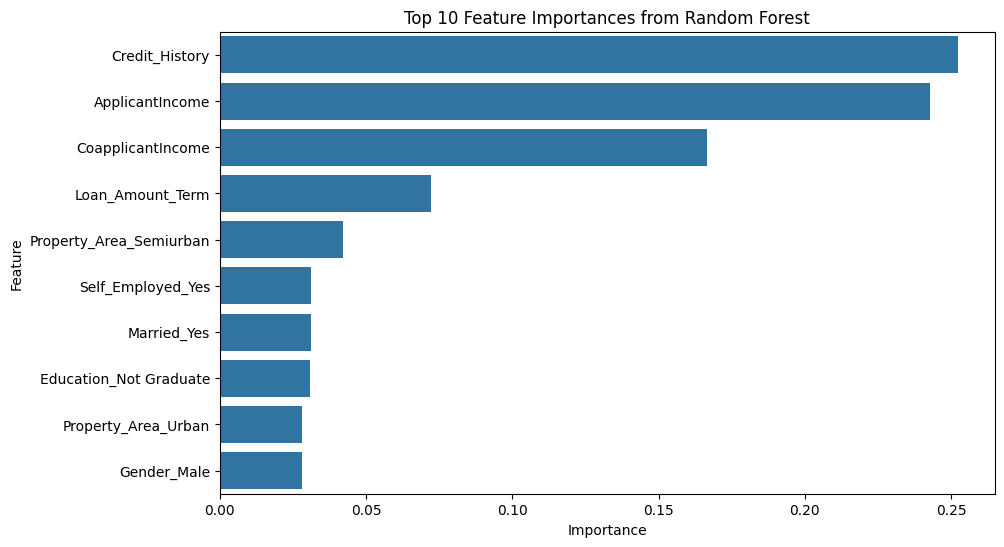

Most Important Features:
                    Feature  Importance
3            Credit_History    0.252330
0           ApplicantIncome    0.242898
1         CoapplicantIncome    0.166415
2          Loan_Amount_Term    0.072202
11  Property_Area_Semiurban    0.042201
10        Self_Employed_Yes    0.031319
5               Married_Yes    0.031130
9    Education_Not Graduate    0.030792
12      Property_Area_Urban    0.028058
4               Gender_Male    0.028027


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fit a Random Forest model for feature importance
def fit_random_forest_and_plot_importance(X_train, y_train, feature_names):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Get feature importances
    importances = rf_model.feature_importances_

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort the DataFrame by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Top 10 features
    plt.title('Top 10 Feature Importances from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    return feature_importance_df

# Call the function to fit Random Forest and plot feature importances
feature_names = features.columns  # Assuming 'features' is a DataFrame
importance_df = fit_random_forest_and_plot_importance(X_train, y_train, feature_names)

# Optional: Print the most important features
print("Most Important Features:")
print(importance_df.head(10))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Select the relevant features
selected_features = ['Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']
X_selected = features[selected_features]
y = target  # Assuming 'target' is already defined

# Split the dataset
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, train_size=0.7, random_state=42)

# Define models and hyperparameters
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest (Class Weight)": RandomForestClassifier(class_weight={0: 2, 1: 1})
}

params = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100]
    },
    "Random Forest (Class Weight)": {
        'n_estimators': [10, 50, 100]
    }
}

# Function to evaluate models
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    report = []
    for model_name, model in models.items():
        gs = GridSearchCV(model, params.get(model_name, {}), cv=3)
        gs.fit(X_train, y_train)
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_test_pred = model.predict(X_test)
        report_dict = classification_report(y_test, y_test_pred, output_dict=True)
        report.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'Precision': report_dict['weighted avg']['precision'],
            'Recall': report_dict['weighted avg']['recall'],
            'F1-Score': report_dict['weighted avg']['f1-score'],
            'Support': report_dict['weighted avg']['support'],
            'False Positives': sum((y_test == 0) & (y_test_pred == 1))
        })
    return pd.DataFrame(report)

# Evaluate models with selected features
model_report_df_selected = evaluate_models(X_train_selected, y_train, X_test_selected, y_test, models, params)

# Identify the best models
best_precision_model = model_report_df_selected.loc[model_report_df_selected['Precision'].idxmax()]
best_recall_model = model_report_df_selected.loc[model_report_df_selected['Recall'].idxmax()]

# Output results
print("Model with Best Precision:")
print(best_precision_model.to_string(index=False))

print("\nModel with Best Recall:")
print(best_recall_model.to_string(index=False))

# Print the complete model report DataFrame
print("\nModel Report DataFrame:")
print(model_report_df_selected.to_string(index=False))

# Optionally save the DataFrame to a CSV file
model_report_df_selected.to_csv('classification_report_selected_features.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

ValueError: Unable to coerce to Series, length must be 1: given 144

# data transgormation
1. without pipeline:
disrtibution change, maping target num on test and train

2. with pipeline
1. missing value
2. train catg to encode laber encoding
3. train numeric to scale